# **Project Name**    -  Capstone Project 3 - Classification - Company Banktruptcy Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Monish Tilwani


# **Project Summary -**

Bankruptcy can have significant consequences for the debtors, creditors, and the economy as a whole.

Given the dataset of financial information of companies, by Taiwan Economic Journal, operating in Taiwan between 1999 and 2009, the goal of this project is to build a binary classification model that predicts whether a company will go bankrupt or not based on their financial information. The project aims to help, make better decisions towards short positions for investors, Banks for there Loans by providing early and accurate signs of bankruptcy, which can help businesses take necessary actions to solve financial distress.

The goal of this project is to develop a machine learning model that can predict the Bankruptcy of companies, using Financial data and other relevant features.

The main steps of the project are:

1. Basic EDA (Exploratory Data Analysis).: I have performed basic EDA to understand the data and its characteristics.

 also, have used Univariate - BI variate - and Multivarite analysis to Understanding the correlation between variables and to explore distribution and intercation of variables.

 also have also used visualization techniques such as histograms, boxplots, scatterplots, heatmaps, etc. to display the results of EDA.

2. Hypothesis testing. I have performed hypothesis testing to test the relationship between the variables. 

  also have used statistical tests such as t-test, f-test. to compare the means or proportions of different groups or categories.


3. Feature Engineering and Data Preprocessing. : to create and select the most relevant and informative features for the model. 

  also have used methods such as correlation analysis variance threshold, etc. to select the best Numerical features for the model. For Categorical variable the result of Hypothesis testing is used.

  also have also performed data cleaning, Scaling and transformation to prepare the data for modeling.

4. ML Model Development and Evaluation : In this project Have developed and evaluated different machine learning Models. Have used both Distance based algorithm KNN and SVC. Also have used Tree Based Algorithm. 

  Used Different techniques such as cross-validation, grid search, regularization, etc. to optimize the model parameters and performance.

  evaluated the model performance using metrics such as Precision,Recall,f1 score and ROC-AUC score and curve.

5. Model Interpretation and Explanation : explained the model predictions using methods such as SHAP values.

  It helped to analyzes the effect of different factors on the Bankruptcy and identifies the key drivers and patterns.


# **GitHub Link -**

https://github.com/Monish-T/Capstone-Project-3-Classification---Company-Bankruptcy-Prediction.git

# **Problem Statement**


Given the dataset of financial information of companies, by Taiwan Economic Journal, operating in Taiwan between 1999 and 2009, the goal of this project is to build a binary classification model that predicts whether a company will go bankrupt or not based on their financial information. The project aims to help, make better decisions towards short positions for investors, Banks for there Loans by providing early and accurate signs of bankruptcy, which can help businesses take necessary actions to solve financial distress.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Basic Libraries
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# For Hypothesis Testing 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA
from imblearn.over_sampling import SMOTE

# ML Algorithms / Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
!pip3 install catboost
from catboost import CatBoostClassifier

# Model Selection
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
    RepeatedStratifiedKFold
)

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve, 
    auc,
    confusion_matrix
)

# Model Explainibility
!pip install shap
import shap 

# Model Deployment
from sklearn.compose import ColumnTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.7 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load Dataset
file_path = '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 3 : Classification - Company Bankruptcy Prediction/COMPANY BANKRUPTCY PREDICTION.csv'
dataset = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of Rows : {dataset.shape[0]}')
print(f'Number of columns : {dataset.shape[1]}')

Number of Rows : 6819
Number of columns : 96


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_df = pd.DataFrame(dataset.isna().sum())
null_df

0
Bankrupt?                                           0
 ROA(C) before interest and depreciation before...  0
 ROA(A) before interest and % after tax             0
 ROA(B) before interest and depreciation after tax  0
 Operating Gross Margin                             0
...                                                ..
 Liability to Equity                                0
 Degree of Financial Leverage (DFL)                 0
 Interest Coverage Ratio (Interest expense to E...  0
 Net Income Flag                                    0
 Equity to Liability                                0

[96 rows x 1 columns]

<Axes: >

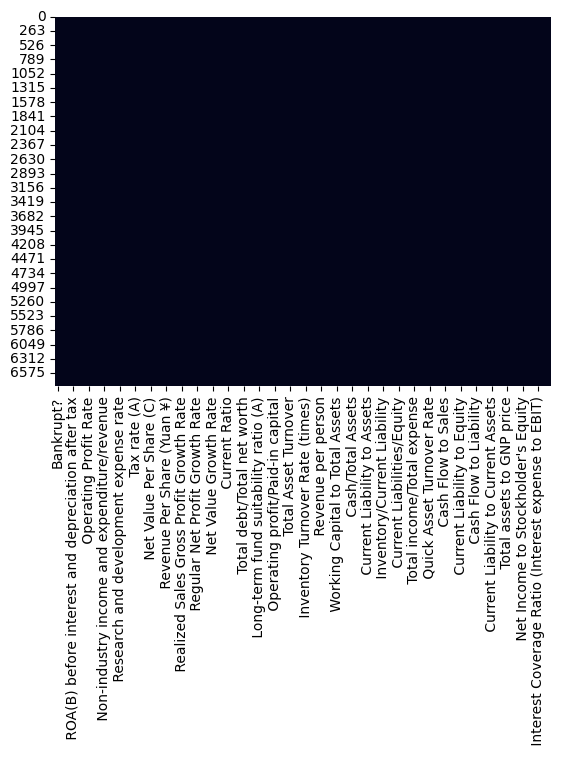

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

> Findings about the given Dataset:

1.   Number of Rows : 6819

  Number of columns : 96
2.   No columns have missing values.
3.   No Duplicate values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns.to_list()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

In [ ]:
# Dataset Describe
dataset.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

### Variables Description 

**Bankrupt -** Wether the company is Bankrupt or not. 1=Yes,0=No



> Complete Data is Transformed and Provided to us. Because of Privacy reasons.
below is the List of variable Names.


X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# printing the count of unique values in each column
# creating a empty dataframe to store the values 
uni_df = pd.DataFrame()
# saving the column list in 1st column
uni_df['Variable'] = dataset.describe(include='all').columns.to_list()
# saving the number of unique variables in 2nd column
uni_df['Num of Unique values'] = uni_df['Variable'].apply(lambda x : dataset[x].nunique())
uni_df

Variable  Num of Unique values
0                                           Bankrupt?                     2
1    ROA(C) before interest and depreciation befor...                  3333
2              ROA(A) before interest and % after tax                  3151
3    ROA(B) before interest and depreciation after...                  3160
4                              Operating Gross Margin                  3781
..                                                ...                   ...
91                                Liability to Equity                  6819
92                 Degree of Financial Leverage (DFL)                  6240
93   Interest Coverage Ratio (Interest expense to ...                  6240
94                                    Net Income Flag                     1
95                                Equity to Liability                  6819

[96 rows x 2 columns]

In [ ]:
# Checking for categorical variables in dataset
uni_df[uni_df['Num of Unique values']<25]

Variable  Num of Unique values
0                Bankrupt?                     2
85   Liability-Assets Flag                     2
94         Net Income Flag                     1

In [ ]:
# printing the unique variable
# creating a list with all column names
column_list = dataset.columns.tolist()
#creating a for loop to print unique variables of each column
for col in column_list:
  print(f"Unique values of column {col} are : \n {dataset[col].unique()} \n \n")

Unique values of column Bankrupt? are : 
 [1 0] 
 

Unique values of column  ROA(C) before interest and depreciation before interest are : 
 [0.37059426 0.46429094 0.42607127 ... 0.47433335 0.54789646 0.49953688] 
 

Unique values of column  ROA(A) before interest and % after tax are : 
 [0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ] 
 

Unique values of column  ROA(B) before interest and depreciation after tax are : 
 [0.40574977 0.51673002 0.47229509 ... 0.63172547 0.52417153 0.52063815] 
 

Unique values of column  Operating Gross Margin are : 
 [0.60145721 0.61023509 0.60145001 ... 0.60445524 0.61044408 0.62740887] 
 

Unique values of column  Realized Sales Gross Margin are : 
 [0.60145721 0.61023509 0.60136352 ... 0.60601191 0.61316825 0.62740887] 
 

Unique values of column  Operating Profit Rate are : 
 [0.9989692  0.99894598 0.99885735 ... 0.998741   0.99917649 0.9980803 ] 
 

Unique values of column  Pre-tax net Interest Rate are : 
 [0.79688715 0.797

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Creating a Copy of DataFrame
df=dataset.copy()

In [ ]:
# Categorical Column list
cat_col_list = df.select_dtypes(include=['int64']).columns.to_list()
cat_col_list

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [ ]:
# Value count for Dependent feature
df['Bankrupt?'].value_counts().reset_index().rename(columns={'index':'Bankrupt',"Bankrupt?":'Count'})

Bankrupt  Count
0         0   6599
1         1    220

In [ ]:
# Value_count for 1st Categorical deature
df[' Net Income Flag'].value_counts().reset_index().rename(columns={'index':'Net Income Flag'," Net Income Flag":'Count'})

Net Income Flag  Count
0                1   6819

All Values are 1. So, will not help in our research. So, will drop the column.

In [ ]:
df.drop(columns=[' Net Income Flag'],inplace=True)

In [ ]:
# Value counts for 2nd Categorical Variable
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [ ]:
# Comparing it with Dependent Variable
df.groupby(['Bankrupt?',' Liability-Assets Flag']).size().reset_index()

Bankrupt?   Liability-Assets Flag     0
0          0                       0  6597
1          0                       1     2
2          1                       0   214
3          1                       1     6

6 Out of 8 companies with Liability Flag =1 are Bankrupt. So, We will keep the feture for Further Study. 

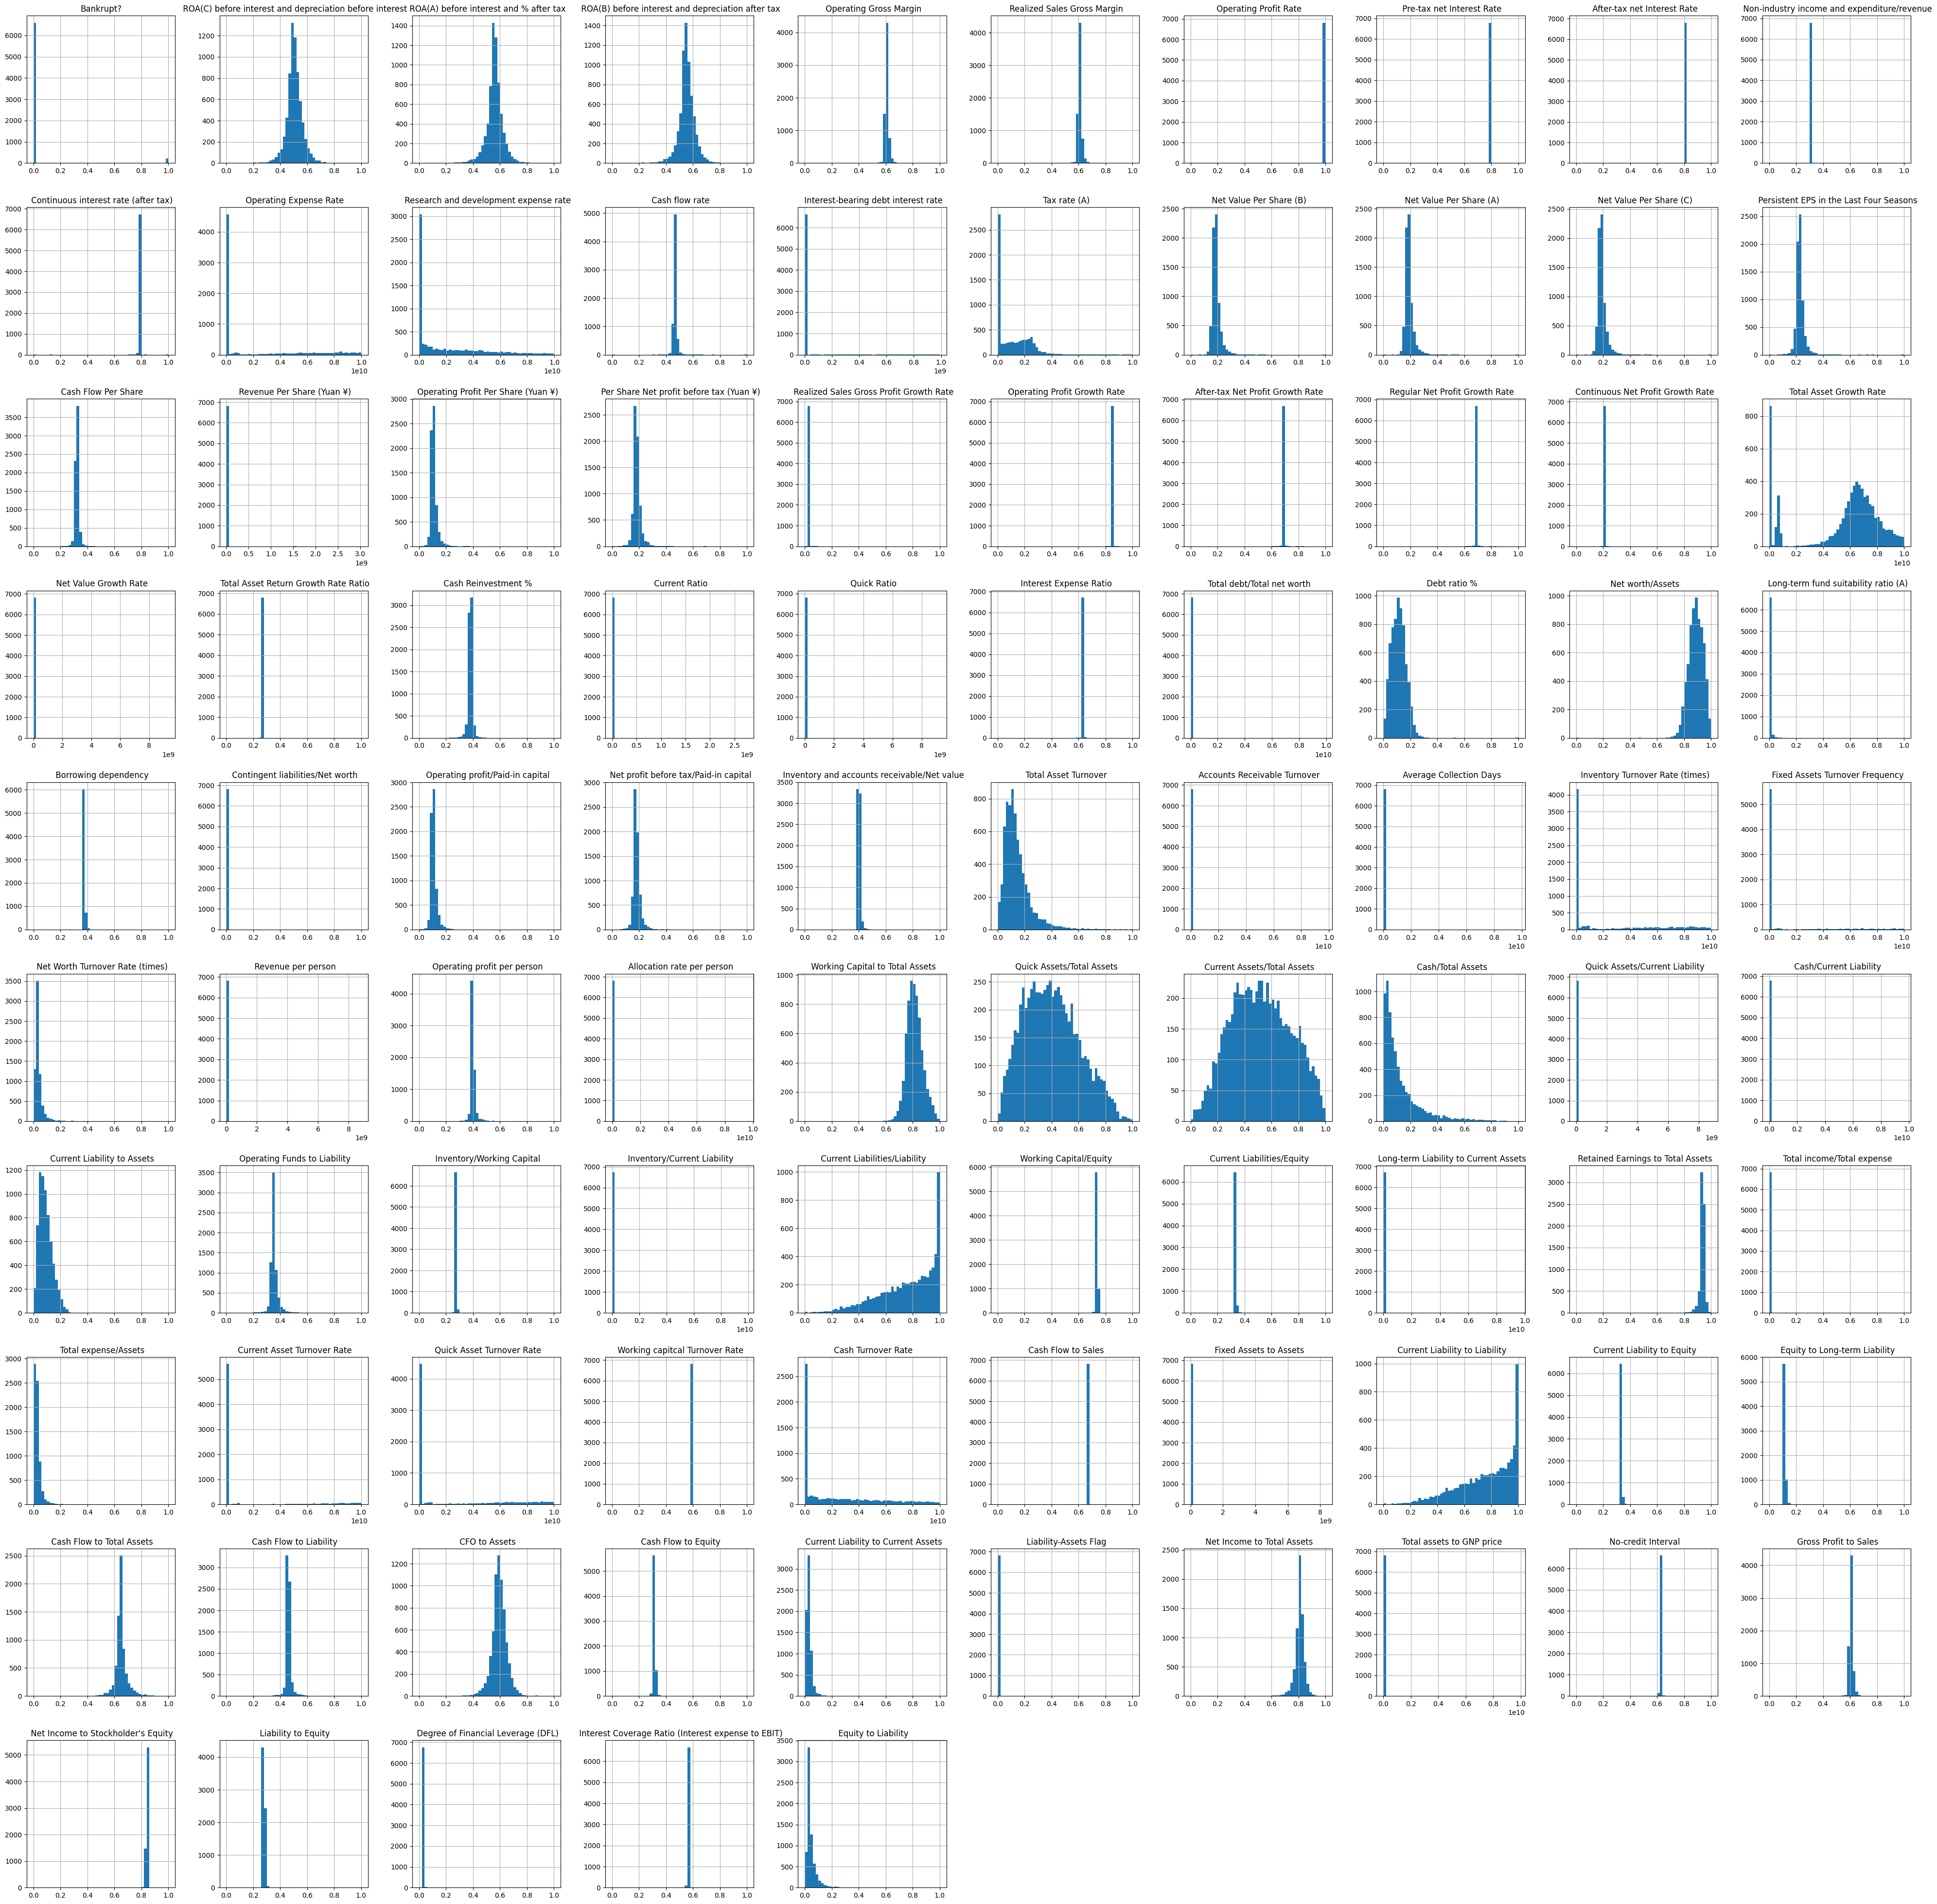

In [ ]:
# Plotting Distributio of all the Variables 
df.hist(figsize=(50,50), bins = 50)
plt.show()

Most Of the Variables are Skewed. So, we will not be using Logitic Regression.

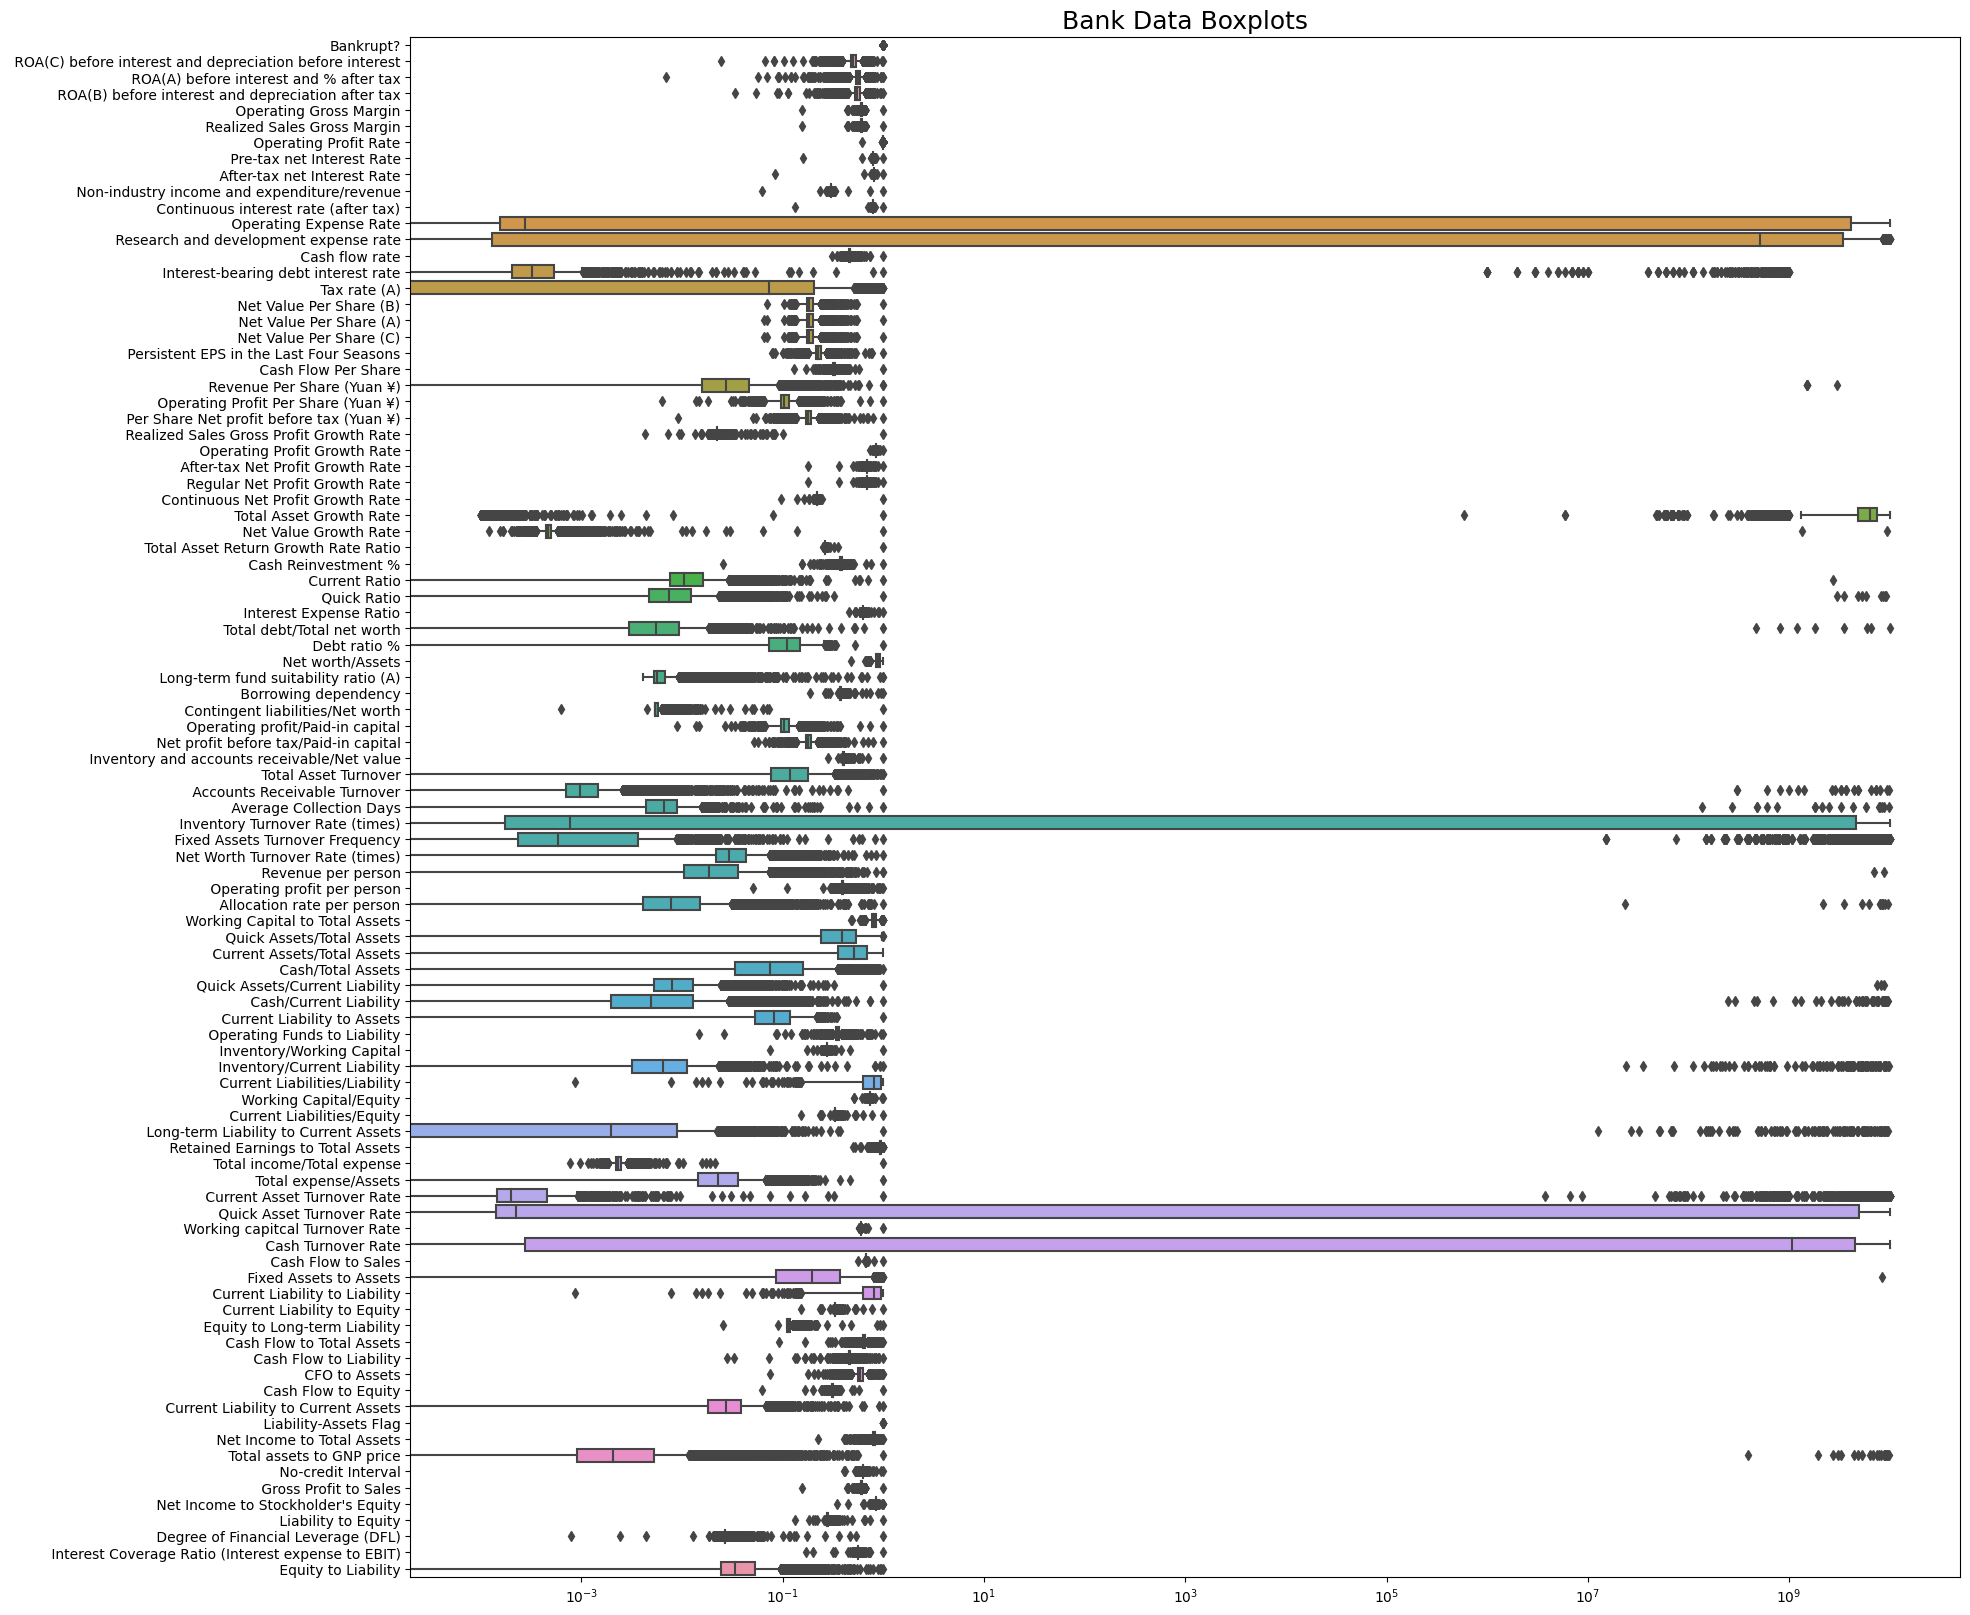

In [ ]:
# Checking the Distribution with Box Plot.
# As the Data is Scaled between 0 and 1 we will use log scale to better understand the Distribution.
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

As the Number Of Variables is High. we will find the Correlation of all the Features with output variable. And Perform EDA on the most Correlated Variables. 

In [ ]:
# creating Correaltion Series for output variable 
df_corr_bar = abs(df.corr())["Bankrupt?"].sort_values()[:-1]
# Plotting the Horizontal Bar chart of Variables according to there correlation with output variable.
fig = px.bar(df_corr_bar, orientation="h", color_discrete_sequence=["#34495E "])
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# checking for exact same Correlation
corr_df = df_corr_bar.sort_values(ascending=False).reset_index().rename(columns={'index':"feature_name","Bankrupt?":"Correlation"})
similar_col = corr_df[corr_df['Correlation'].duplicated()]
similar_col_list = list(similar_col['feature_name'])
similar_col_list

[' Current Liabilities/Equity', ' Current Liabilities/Liability']

In [ ]:
similar_col_list

[' Current Liabilities/Equity', ' Current Liabilities/Liability']

Dropping similar variables

In [ ]:
df.drop(columns=similar_col_list,inplace=True)

Selecting Features having Correlation more than 0.05 to perform EDA and understand the trend of change in output.

In [ ]:

top_features = df_corr_bar.sort_values(ascending=False).reset_index().rename(columns={'index':"feature_name","Bankrupt?":"Correlation"})
top_features = top_features[top_features['Correlation']>0.05]
imp_features = top_features['feature_name'].to_list()

Understanding the Top features by performing EDA.

### What all manipulations have you done and insights you found?

1. Drop Net Income Flag Column. As all values are 1.
2. Class Imbalance in Output Variable. will apply Smote Further.
3. Drop Repeatative columns Current Liabilities/Equity and Current Liabilities to equity.
4. Plotted Histogram of all the variables and found that most the variables have skewed data. So, will not use Logistic Regression.
5. Found the Correlation of all the variables with output variable. created the list of the same and will study the top correlated variables through Visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

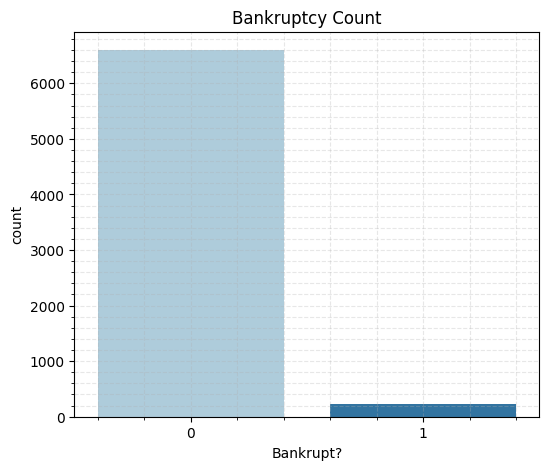

In [ ]:
# Chart - 1 visualization code
# setting the chart size
ax = plt.figure(figsize=(6,5))
# setting the axis label for chart
ax= sns.countplot(data=df, x="Bankrupt?",palette='Paired')
ax.set(title='Bankruptcy Count')
# adding visualizations to chart
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To plot the count of Output variable.

##### 2. What is/are the insight(s) found from the chart?

There is very high Imbalance in data. Only 3% companies have been Bankrupt. 

We will use Smote before applying the ML algorithm.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Only about 3% companies are Bankrupt. So, it is very difficult to judge wether the company will go bankrupt or not. It is necessary to predict the companies as it can help from financial distress to investors and company.

#### Chart - 2

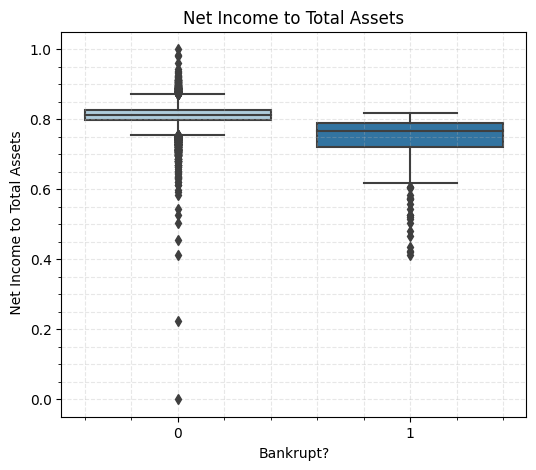

In [ ]:
# Chart - 2 visualization code

# setting the chart size
ax = plt.figure(figsize=(6,5))
# setting the axis label for chart
ax= sns.boxplot(data=df, x="Bankrupt?",y=' Net Income to Total Assets',palette='Paired')
ax.set(title='Net Income to Total Assets')
# adding visualizations to chart
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the trend of Net Income to sales for the most correlated variable. on the output variable.

##### 2. What is/are the insight(s) found from the chart?

Net Income to assets ratio is very low for Bankrupt Companies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Net Income to assests ratio is high and concentrated in the same region and for Bankrupt companies it is low and data is Spread on the lower side.

So, we can say that companies with lower Net Income to assets has high chance of Bankruptcy compared to Other Companies.

In [ ]:
df = df[df[' Net Income to Total Assets']>0.4]
df.shape

(6817, 93)

#### Chart - 3

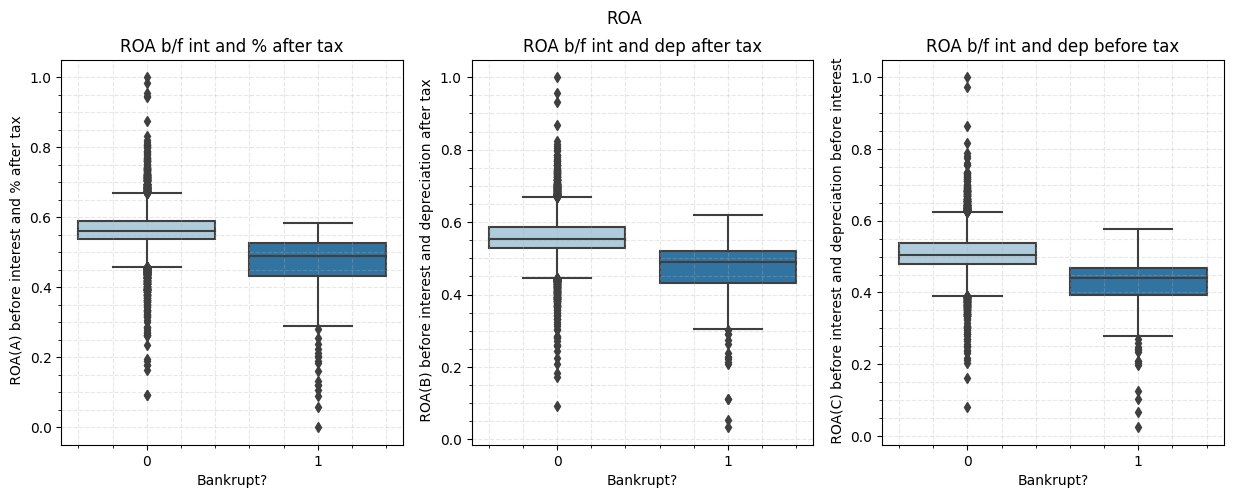

In [ ]:
# Chart - 3 visualization code
# setting the axis and chart size for subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ROA')
# First subplot
sns.boxplot(ax=ax1,data=df, x="Bankrupt?",y=' ROA(A) before interest and % after tax',palette='Paired')
ax1.set_title('ROA b/f int and % after tax')
ax1.plot()
# Second subplot
sns.boxplot(ax=ax2,data=df, x="Bankrupt?",y=' ROA(B) before interest and depreciation after tax',palette='Paired')
ax2.set_title('ROA b/f int and dep after tax')
ax2.plot()
# Second subplot
sns.boxplot(ax=ax3,data=df, x="Bankrupt?",y=' ROA(C) before interest and depreciation before interest',palette='Paired')
ax3.set_title('ROA b/f int and dep before tax')
ax3.plot()
# adding visualizations to chart
ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()
ax3.grid(which='both',alpha=0.3,linestyle='--')
ax3.minorticks_on()
plt.show()

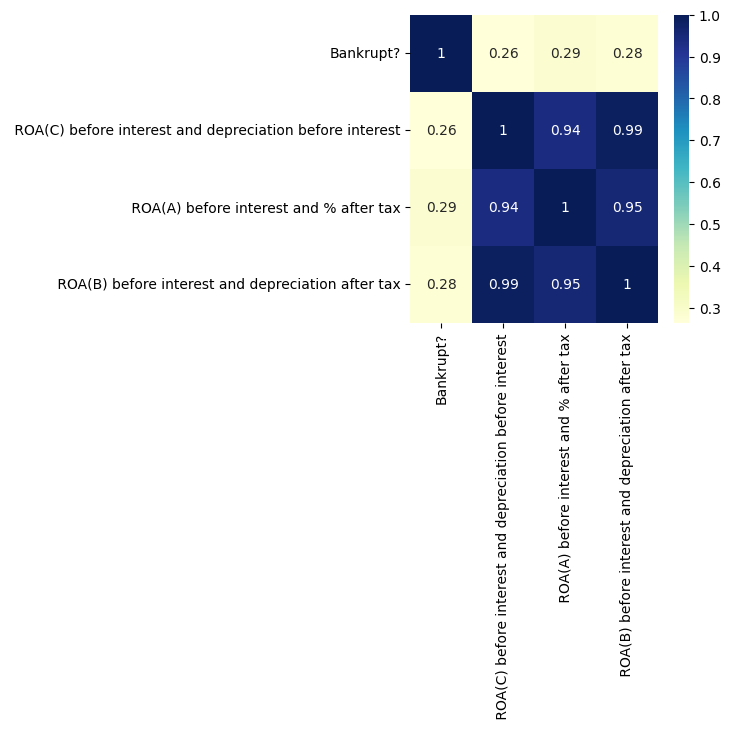

In [ ]:
# Plotting the correlation Heat map of all The three ROA variables with Output variable
plt.figure(figsize=(4,4))
sns.heatmap(abs(df[['Bankrupt?',
                    ' ROA(C) before interest and depreciation before interest',
                    ' ROA(A) before interest and % after tax',
                    ' ROA(B) before interest and depreciation after tax']].corr()), 
            cmap="YlGnBu", annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

TO understand the Correlation of all the three variables of Return on Assets, with output variables

##### 2. What is/are the insight(s) found from the chart?

All the variables have approximately similar means and Distribution for both the categories of output variable. 

Also from Correlation heat map we can see that All the Variables have very High multicollinearity. So, we will carry out one way anova hypothesis testing to varify wether we can drop the other 2 variables having low Correlation with Output variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the subject knowledge all the three variables are different.

But when used in the study of Bankruptcy Classification we can see that there is High Collinearity. So to evaluate the Performance of Company on all the three Factors will not be a efficient way. Decision maker should consider only the most effective Variable on company Stability.

#### Chart - 4

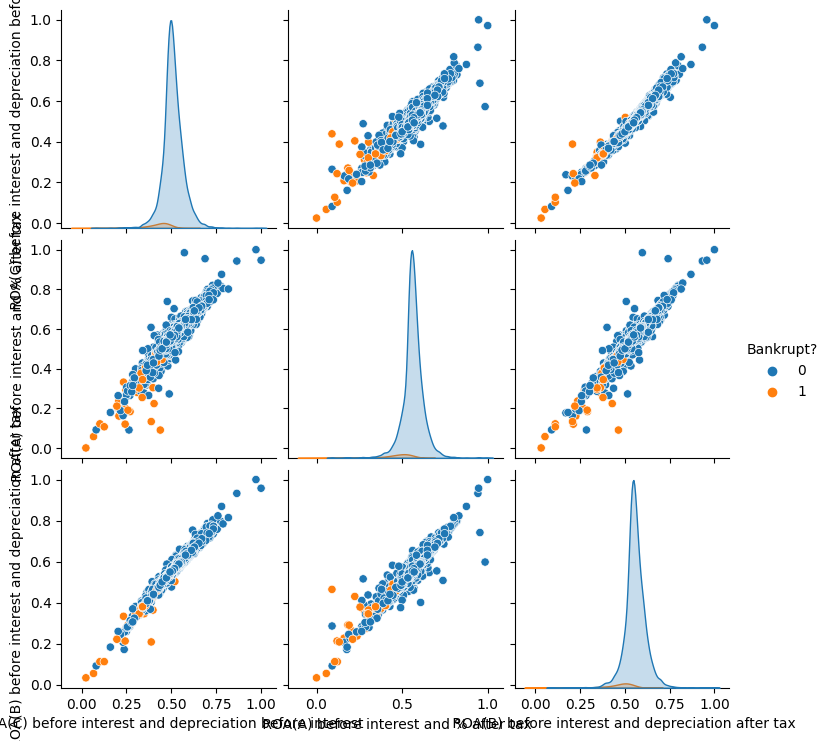

In [ ]:
# Chart - 4 visualization code
temp_df = df[[' ROA(C) before interest and depreciation before interest',
              ' ROA(A) before interest and % after tax',
              ' ROA(B) before interest and depreciation after tax',
              'Bankrupt?']]
sns.pairplot(temp_df, hue="Bankrupt?")

##### 1. Why did you pick the specific chart?

To Further Understand all the Three variables distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

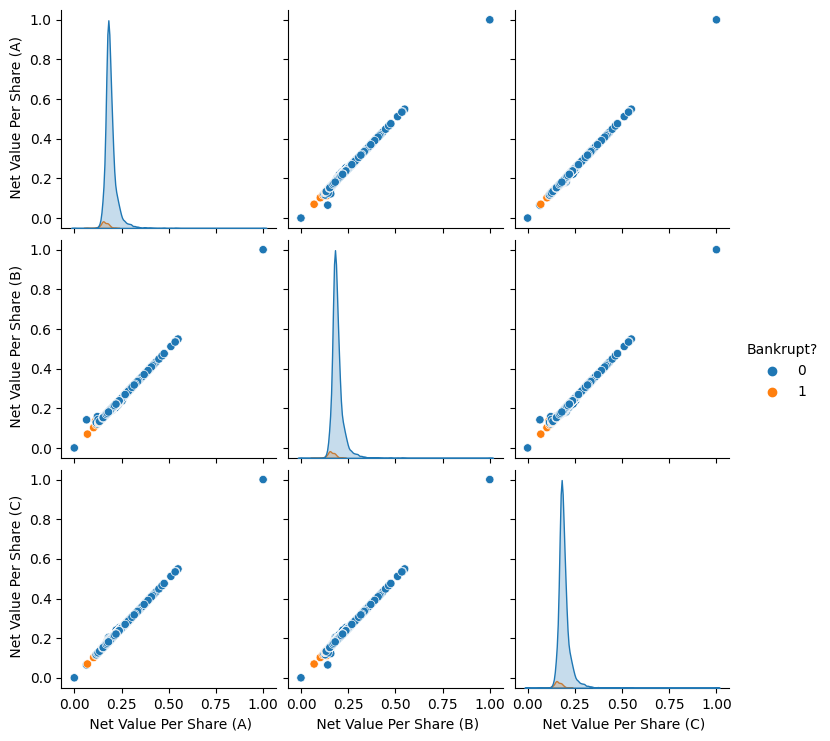

In [ ]:
# Chart - 5 visualization code
temp_df = df[[' Net Value Per Share (A)',
              ' Net Value Per Share (B)',
              ' Net Value Per Share (C)',
              'Bankrupt?']]
sns.pairplot(temp_df, hue="Bankrupt?")


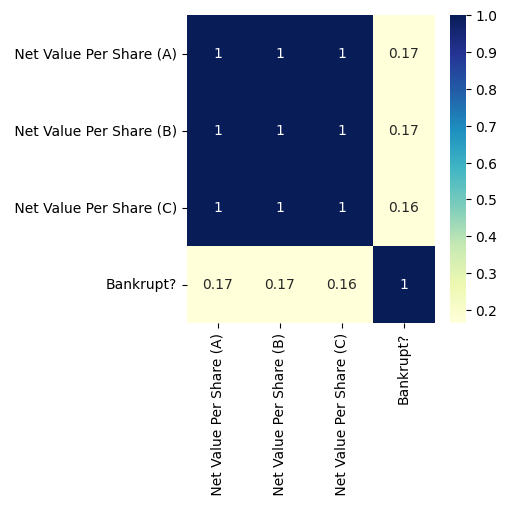

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(abs(temp_df.corr()), 
            cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df = df[df[' Net Value Per Share (A)']<1]
df.shape

(6816, 93)

In [ ]:
df = df[df[' Net Value Per Share (A)']>0]
df.shape

(6815, 93)

##### 1. Why did you pick the specific chart?

To Understand the effect of three similar variables. Net Value per share A, B and C.

##### 2. What is/are the insight(s) found from the chart?

All the variables have approximately similar means and Distribution for both the categories of output variable.

Also from Correlation heat map we can see that All the Variables have very High multicollinearity. So, we will carry out one way anova hypothesis testing to varify wether we can drop the other 2 variables having low Correlation with Output variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the subject knowledge all the three variables are different.

But when used in the study of Bankruptcy Classification we can see that there is High Collinearity. So to evaluate the Performance of Company on all the three Factors will not be a efficient way. Decision maker should consider only the most effective Variable on company Stability.

#### Chart - 6

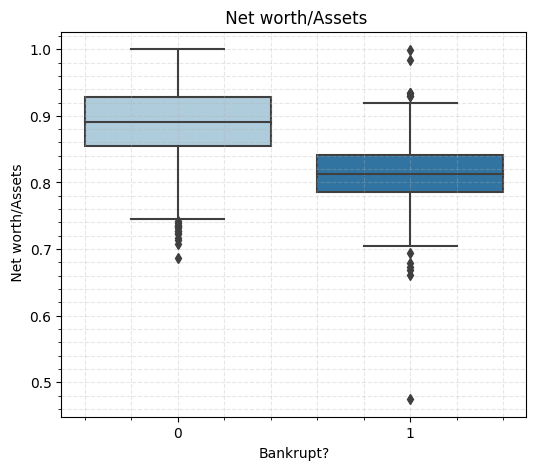

In [ ]:
# Chart - 6 visualization code
# setting the chart size
ax = plt.figure(figsize=(6,5))
# setting the axis label for chart
ax= sns.boxplot(data=df, x="Bankrupt?",y=' Net worth/Assets',palette='Paired')
ax.set(title=' Net worth/Assets')
# adding visualizations to chart
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()


In [ ]:
df = df[df[' Net worth/Assets']>0]
df.shape

(6815, 93)

##### 1. Why did you pick the specific chart?

TO under the Distribution of Net woth/Assets for bot the categories of output variable.

##### 2. What is/are the insight(s) found from the chart?

Mean Net worth/ Assets for a Bankrupt company is very low campared to a non bankrupt company. 75% of data for each category falls in 25% region of others Category. So it will be easy to make nodes with less impurity. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Net Worth/ Assets is very important factor to undesrtand the performance of the company. by Categorising on bases of Net worth/Assets a investor or institute can easily understand the performance.

#### Chart - 7

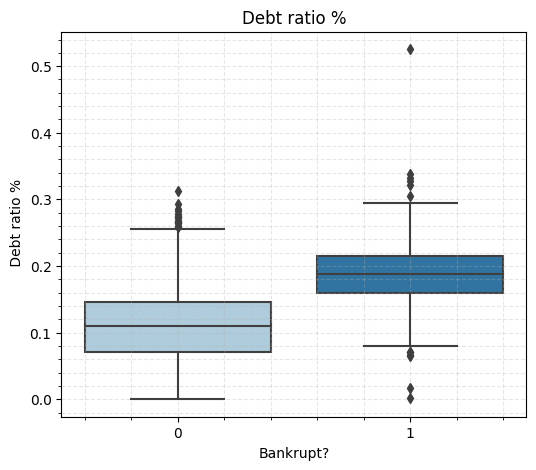

In [ ]:
# Chart - 7 visualization code

# setting the chart size
ax = plt.figure(figsize=(6,5))
# setting the axis label for chart
ax= sns.boxplot(data=df, x="Bankrupt?",y=' Debt ratio %',palette='Paired')
ax.set(title='Debt ratio %')
# adding visualizations to chart
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()


In [ ]:
df = df[df[' Debt ratio %']<1]
df.shape

(6815, 93)

##### 1. Why did you pick the specific chart?

To understand teh effect of Debt ratios on the Bankruptcy of company.

##### 2. What is/are the insight(s) found from the chart?

Debt Ratio is very high for bankrupt companies compared to non Bankrupt.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company with rising debt ratio. Or you can caompany having higher debt compared to the assets holded by the company has higher chances of bankruptcy.

Companies debt to Assets Ratio should have a limit. which Can help save financial distress well in advance.

#### Chart - 8

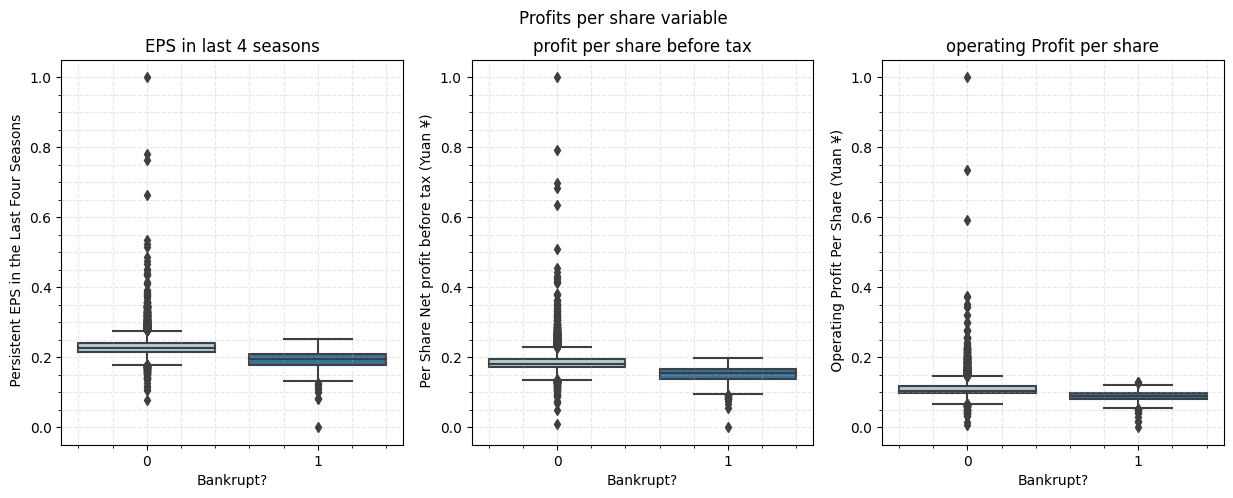

In [ ]:
# Chart - 8 visualization code


# setting the axis and chart size for subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Profits per share variable')
# First subplot
sns.boxplot(ax=ax1,data=df, x="Bankrupt?",y=' Persistent EPS in the Last Four Seasons',palette='Paired')
ax1.set_title('EPS in last 4 seasons')
ax1.plot()
# Second subplot
sns.boxplot(ax=ax2,data=df, x="Bankrupt?",y=' Per Share Net profit before tax (Yuan ¥)',palette='Paired')
ax2.set_title('profit per share before tax')
ax2.plot()
# Second subplot
sns.boxplot(ax=ax3,data=df, x="Bankrupt?",y=' Operating Profit Per Share (Yuan ¥)',palette='Paired')
ax3.set_title('operating Profit per share')
ax3.plot()
# adding visualizations to chart
ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()
ax3.grid(which='both',alpha=0.3,linestyle='--')
ax3.minorticks_on()
plt.show()

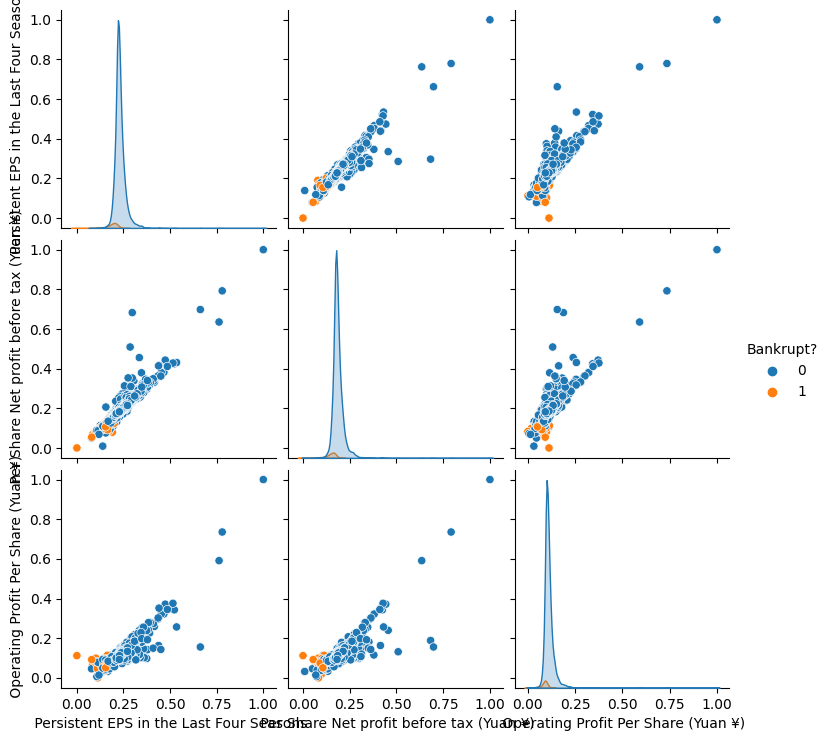

In [ ]:
temp_df = df[[' Persistent EPS in the Last Four Seasons',
              ' Per Share Net profit before tax (Yuan ¥)',
              ' Operating Profit Per Share (Yuan ¥)',
              'Bankrupt?']]
sns.pairplot(temp_df, hue="Bankrupt?")


In [ ]:
df = df[df[' Per Share Net profit before tax (Yuan ¥)']<0.6]
df.shape

(6810, 93)

##### 1. Why did you pick the specific chart?

To undertand all the 3 variables related to profit per share.

EPS earnings per share in the Last Four Seasons

Per Share Net profit before tax (Yuan ¥)

Operating Profit Per Share (Yuan ¥)earnings per share

##### 2. What is/are the insight(s) found from the chart?

All the three variables are multicollinear and haev similar effect on output variable. But the effect is exacatly siilar can be assessed by performing Anova one way Hypothesis testing.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Persistent EPS in last four season is a better factor to understand the unstability of company compared to Net profit per Share and Operating Profit per Share.

So to evaluate the stability of company EPS in last Four Seasons SHould be given more importance compared to other measurment related to profits from Shares.

#### Chart - 9

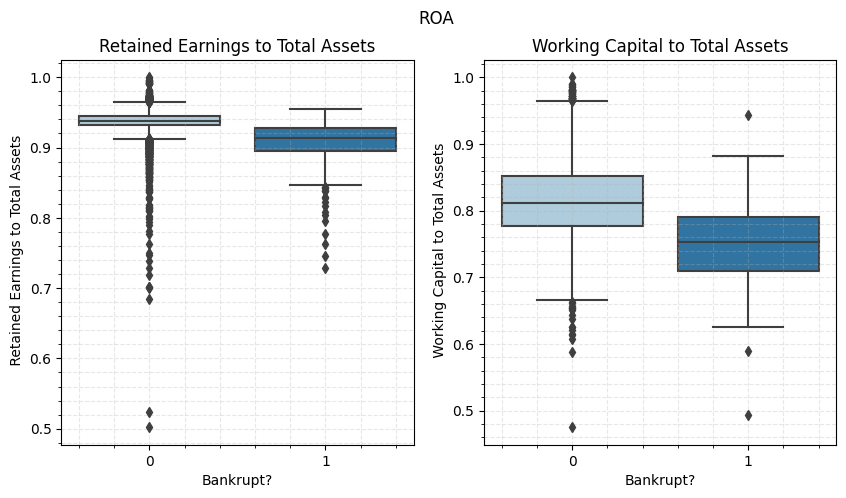

In [ ]:
# Chart - 9 visualization code
 


# setting the axis and chart size for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('ROA')
# First subplot
sns.boxplot(ax=ax1,data=df, x="Bankrupt?",y=' Retained Earnings to Total Assets',palette='Paired')
ax1.set_title('Retained Earnings to Total Assets')
ax1.plot()
# Second subplot
sns.boxplot(ax=ax2,data=df, x="Bankrupt?",y=' Working Capital to Total Assets',palette='Paired')
ax2.set_title('Working Capital to Total Assets')
ax2.plot()

# adding visualizations to chart
ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()

plt.show()

##### 1. Why did you pick the specific chart?

To undertand how working capital to assets and retained Earnings to assets effect the Bankruptcy of Companies.

##### 2. What is/are the insight(s) found from the chart?

Companies with higher chances of bankruptcy have lower working capital to assets ratio and lower retaining of earnings to total assets. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is Difficult to predict the Bankruptcy of company from working capital to assets compared to retaining eranings to total assets ratio.

Even though a company havinf a lower working capital to assets ratio can be stable company if retained earnings to assets is high for the company.

#### Chart - 10

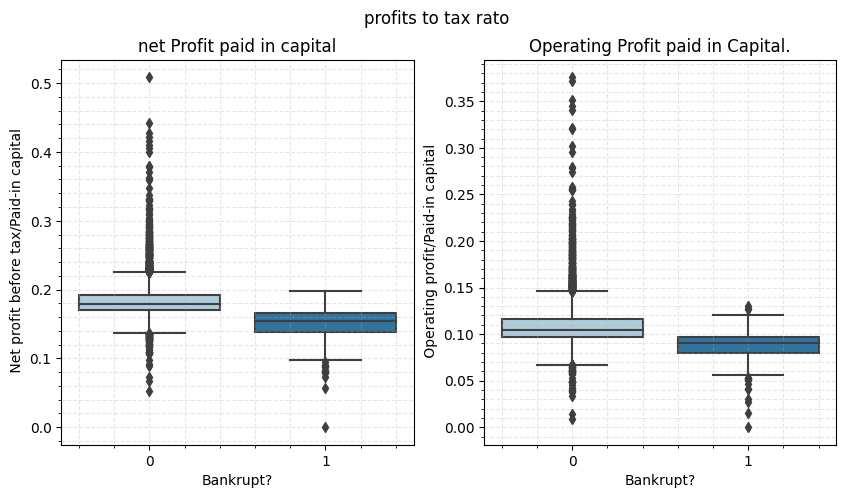

In [ ]:
# Chart - 10 visualization code

 # setting the axis and chart size for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('profits to tax rato')
# First subplot
sns.boxplot(ax=ax1,data=df, x="Bankrupt?",y=' Net profit before tax/Paid-in capital',palette='Paired')
ax1.set_title('net Profit paid in capital')
ax1.plot()
# Second subplot
sns.boxplot(ax=ax2,data=df, x="Bankrupt?",y=' Operating profit/Paid-in capital',palette='Paired')
ax2.set_title('Operating Profit paid in Capital.')
ax2.plot()

# adding visualizations to chart
ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()

plt.show() 

##### 1. Why did you pick the specific chart?

To undertand the effect of both the variables on output variable.

##### 2. What is/are the insight(s) found from the chart?

Both the Vairbles have kind of similar effect on the Output variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Any one out of the two Variables will can be used to study the stability of the company as both have simlar effect on both the categories of the output variable.

#### Chart - 11

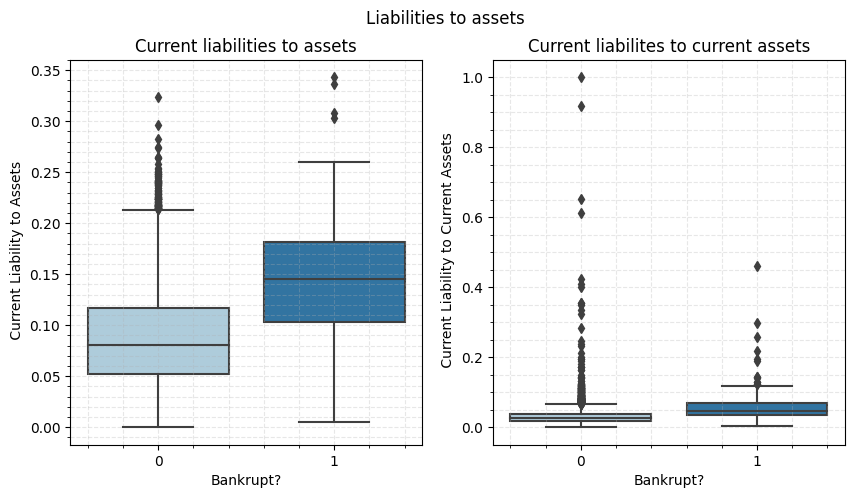

In [ ]:
# Chart - 11 visualization code




 # setting the axis and chart size for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Liabilities to assets')
# First subplot
sns.boxplot(ax=ax1,data=df, x="Bankrupt?",y=' Current Liability to Assets',palette='Paired')
ax1.set_title('Current liabilities to assets')
ax1.plot()
# Second subplot
sns.boxplot(ax=ax2,data=df, x="Bankrupt?",y=' Current Liability to Current Assets',palette='Paired')
ax2.set_title('Current liabilites to current assets')
ax2.plot()

# adding visualizations to chart
ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()

plt.show() 

##### 1. Why did you pick the specific chart?

to undertand which variable can better understand the output variable.

Cuurent Liabilities to Total Assets or Current Liabilities to Current Assets.

##### 2. What is/are the insight(s) found from the chart?

Current liabilities to Total Assets can explain the Output variable better as the data has better Distribution as it is wide spread and can be easily understood.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Companies having Higher Current Liabilities to Total assets have Higher chance of bankruptcy. So the companies with rising liability to total assets should be kept close watch.

#### Chart - 12

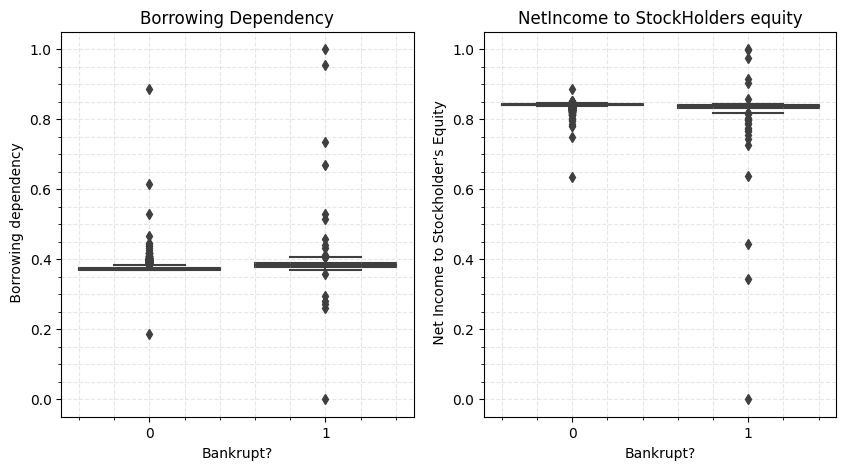

In [ ]:
# Chart - 12 visualization code
 

 # setting the axis and chart size for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# fig.suptitle('ROA')
# First subplot
sns.boxplot(ax=ax1,data=df, x="Bankrupt?",y=' Borrowing dependency',palette='Paired')
ax1.set_title('Borrowing Dependency')
ax1.plot()
# Second subplot
sns.boxplot(ax=ax2,data=df, x="Bankrupt?",y=" Net Income to Stockholder's Equity",palette='Paired')
ax2.set_title('NetIncome to StockHolders equity')
ax2.plot()

# adding visualizations to chart
ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()

plt.show() 

As the data has High Value of Kurtosis and mean for both the categories are also same. So for all the variables having lower correlational cannot be studied without depeer understanding. Also, no understanding can be developed.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Correlation heat Map 

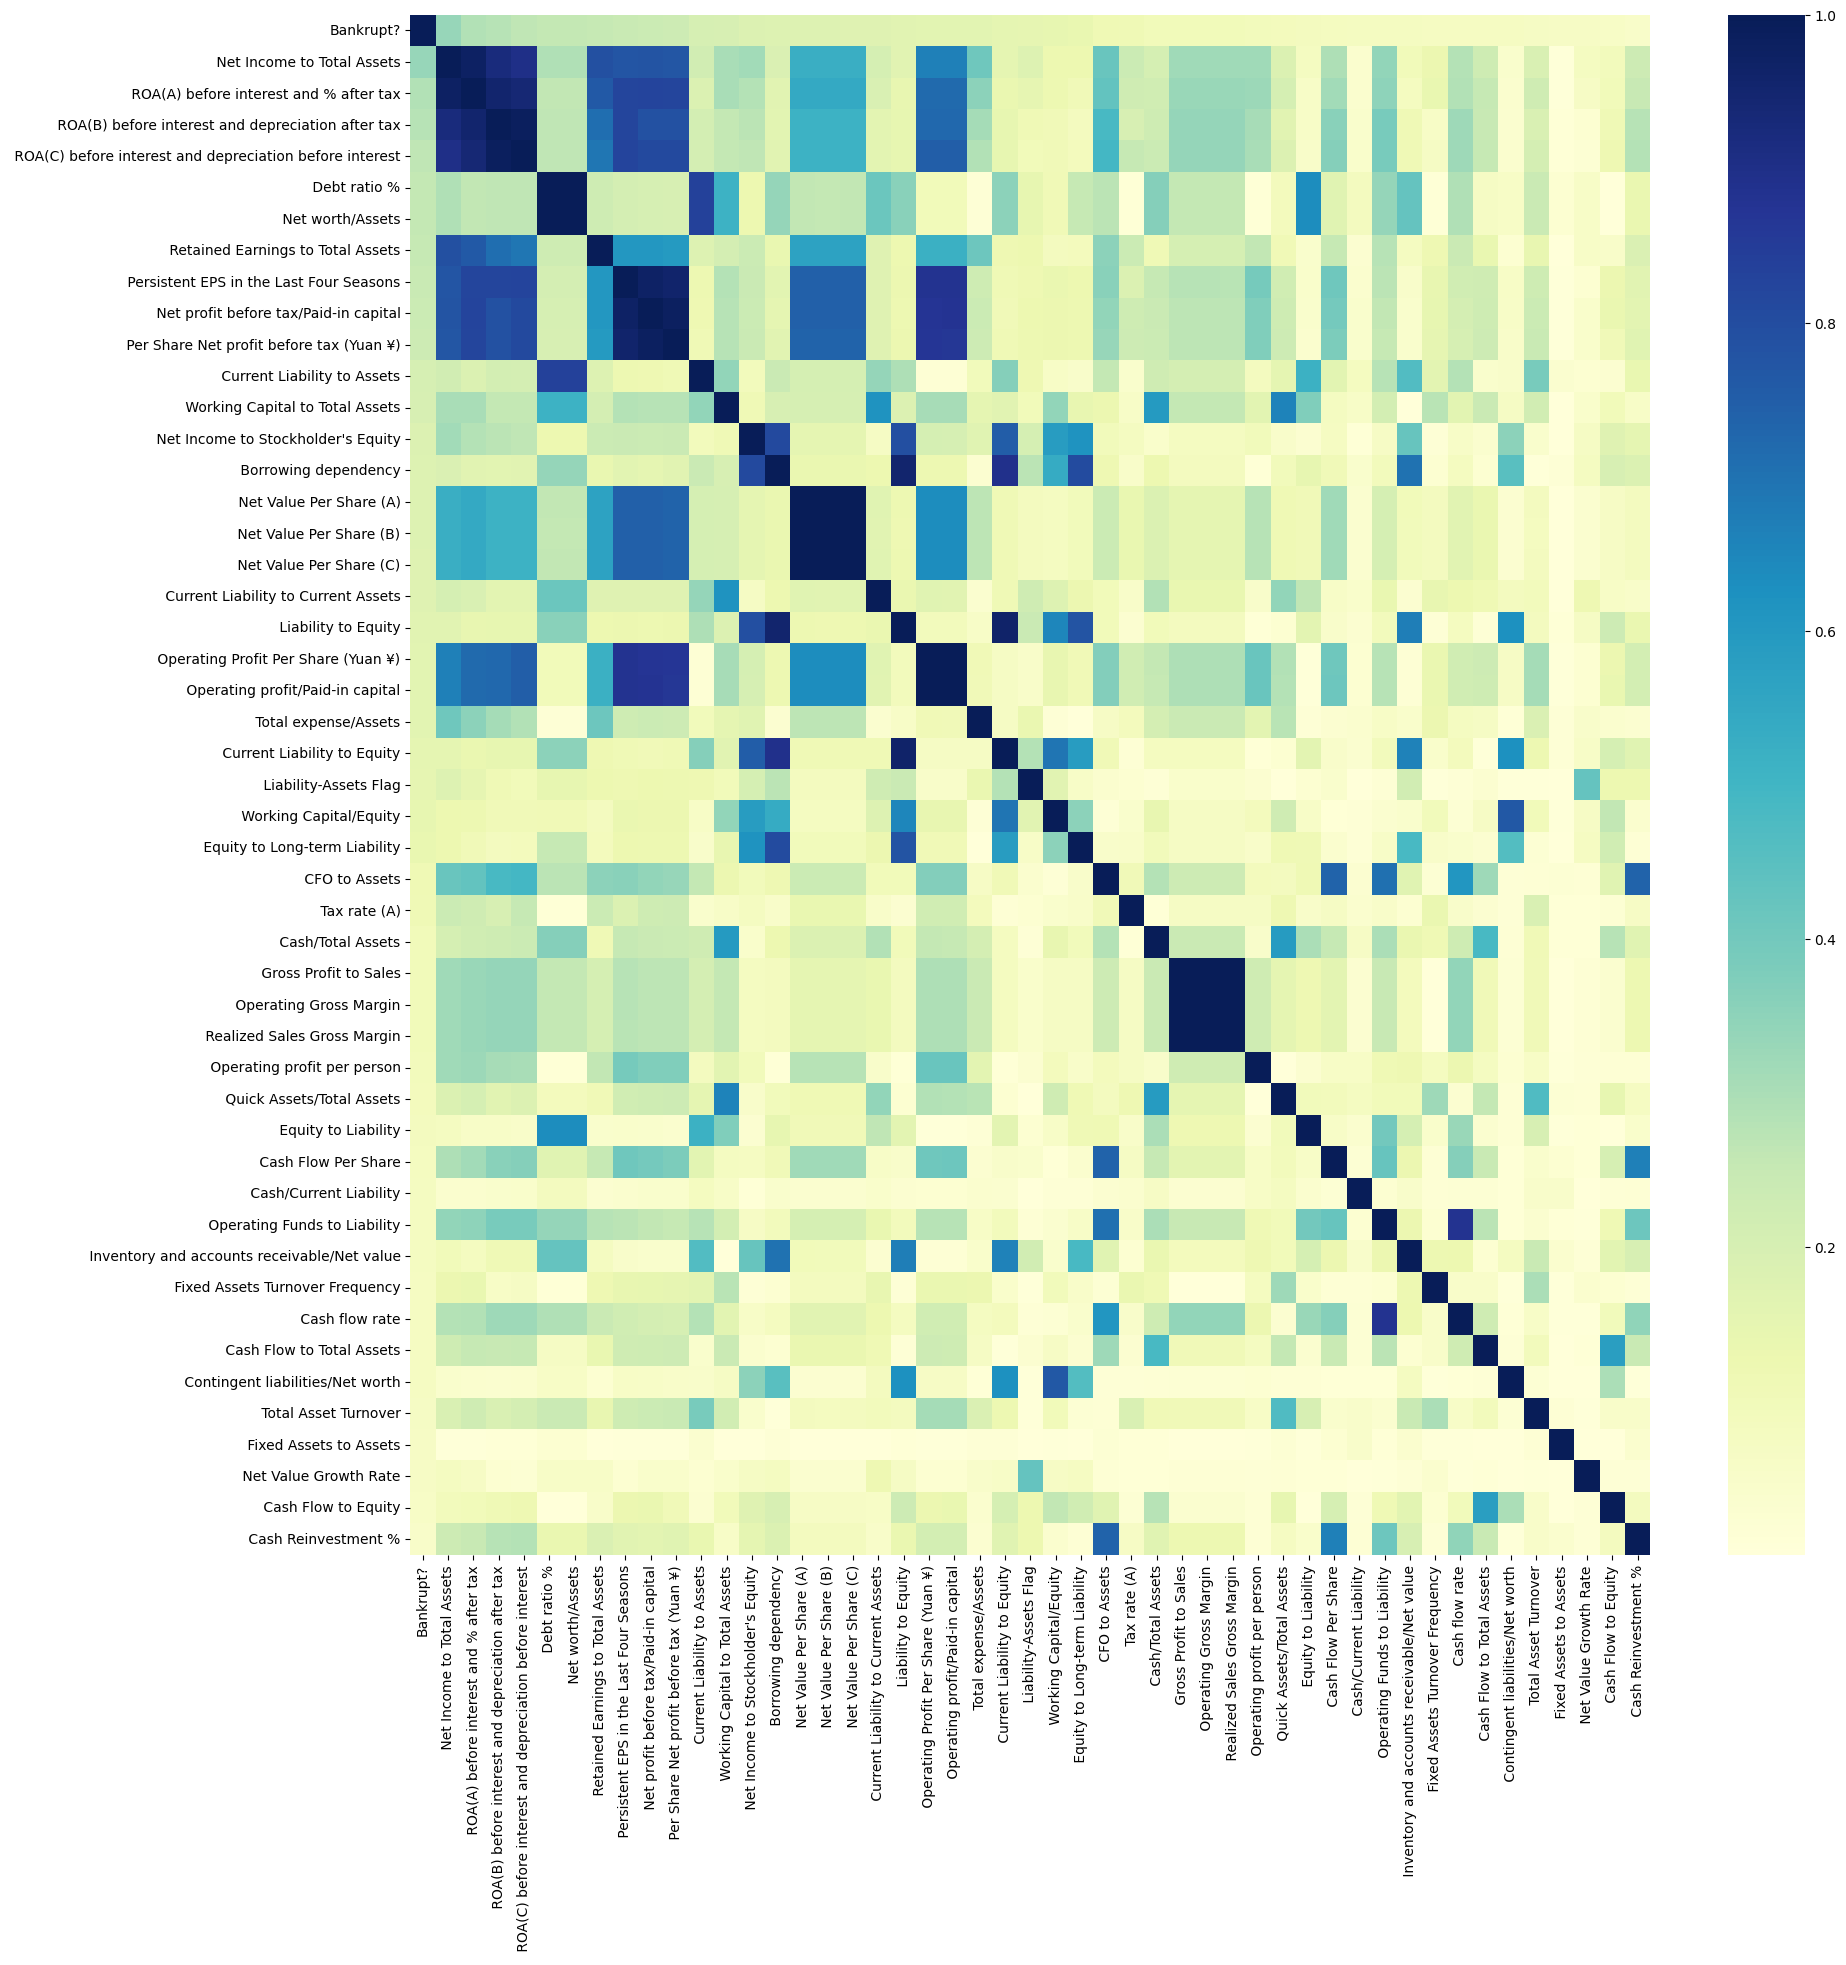

In [ ]:
# Correaltion visualization code
df_corr_bar = abs(df.corr())["Bankrupt?"].sort_values()
top_features = df_corr_bar.sort_values(ascending=False).reset_index().rename(columns={'index':"feature_name","Bankrupt?":"Correlation"})
top_features = top_features[top_features['Correlation']>0.05]
imp_features = top_features['feature_name'].to_list()
plt.figure(figsize=(20,20))
sns.heatmap(abs(df[imp_features].corr()), cmap="YlGnBu", annot=False)
plt.show()

##### 1. Why did you pick the specific chart?

To undertsand the correlation of Varibles having High correlation with Output Variables. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1 : mean of Borrowing Dependency Two samples with and without Bankrupt companies are equal.

Hypothesis 2 : One-way ANOVA hypothesis testing: mean of ROA(A) , ROA(B) and ROA(C) are equal. 

Hypothesis 3 : One-way ANOVA hypothesis testing: population mean of Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C) are equal. 

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H_O) : mean_bankrupt_companies_borrowing_dependency = mean_non_bankrupt_companies_borrowing_dependency

Alternate Hypothesis(H_A) : mean_bankrupt_companies_borrowing_dependency != mean_non_bankrupt_companies_borrowing_dependency

Significance level : alpha = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
df_with_bankruptcompanies = df[df['Bankrupt?']==1]
df_with_out_bankruptcompanies = df[df['Bankrupt?']==0]

#perform two-sample t-test with unequal variance
ttest_ind(df_with_bankruptcompanies[' Borrowing dependency'], df_with_out_bankruptcompanies[' Borrowing dependency'], equal_var=False)

Ttest_indResult(statistic=3.3156894674186708, pvalue=0.0010697869515039614)

##### Which statistical test have you done to obtain P-Value?

t test for Two Sample mean with unequal Variance.

##### Why did you choose the specific statistical test?

The results of two sample t-test consist of two values: the t-statistic and the p-value. 

The t-statistic measures how far the difference between the sample means is from zero, relative to the variation within the samples. A large t-statistic indicates that the sample means are far apart compared to the variation within the samples. 

The p-value measures the probability of obtaining such a large t-statistic if the null hypothesis is true. The null hypothesis is that both population means are equal. A small p-value (usually less than 0.05) indicates that the null hypothesis is unlikely to be true and that there is a significant difference between the population means.

So we can successfully reject Null Hypothesis in Favour of Alternate hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H_O) : mean_ROA_A = mean_ROA_B = mean_ROA_C

Alternate Hypothesis(H_A) : mean_ROA_A != mean_ROA_B != mean_ROA_C

Significance level : alpha = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

f_oneway(df[' ROA(C) before interest and depreciation before interest'],
       df[' ROA(A) before interest and % after tax'],
       df[' ROA(B) before interest and depreciation after tax'])

F_onewayResult(statistic=1563.0906616714976, pvalue=0.0)

##### Which statistical test have you done to obtain P-Value?

F - one way ANOVA test is used to optain the p value.

##### Why did you choose the specific statistical test?

The output of f_oneway consists of two values: the F-statistic and the p-value.

The F-statistic measures how much the variance between the group means differs from the variance within the groups. A large F-statistic indicates that the group means are far apart compared to the variation within the groups. 

The p-value measures the probability of obtaining such a large F-statistic. The null hypothesis is that all the group means are equal. A small p-value (usually less than 0.05) indicates that the null hypothesis is unlikely to be true and that there is a significant difference among the group means. 

So we can Successfully reject the null Hypothesis in favour of Alternative Hypothesis. 

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H_O) : mean_net_value_per_share_A = mean_net_value_per_share_B = mean_net_value_per_share_C

Alternate Hypothesis(H_A) : mean_net_value_per_share_A != mean_net_value_per_share_B != mean_net_value_per_share_C

Significance level : alpha = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
f_oneway(df[' Net Value Per Share (A)'],
       df[' Net Value Per Share (B)'],
       df[' Net Value Per Share (C)'])

F_onewayResult(statistic=0.0028487387411166637, pvalue=0.9971553154606917)

##### Which statistical test have you done to obtain P-Value?

F - one way ANOVA test is used to optain the p value.

##### Why did you choose the specific statistical test?

The output of f_oneway consists of two values: the F-statistic and the p-value.

The F-statistic measures how much the variance between the group means differs from the variance within the groups. the variation between the group means is very small compared to the variation within the groups.

The p-value measures the probability of obtaining such a large F-statistic. The null hypothesis is that all the group means are equal. A large p-value indicates that the null hypothesis is likely to be true and that there is no significant difference among the group means and that the null hypothesis cannot be rejected.

So we have failed to reject the null Hypothesis in favour of Alternative Hypothesis. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

<Axes: >

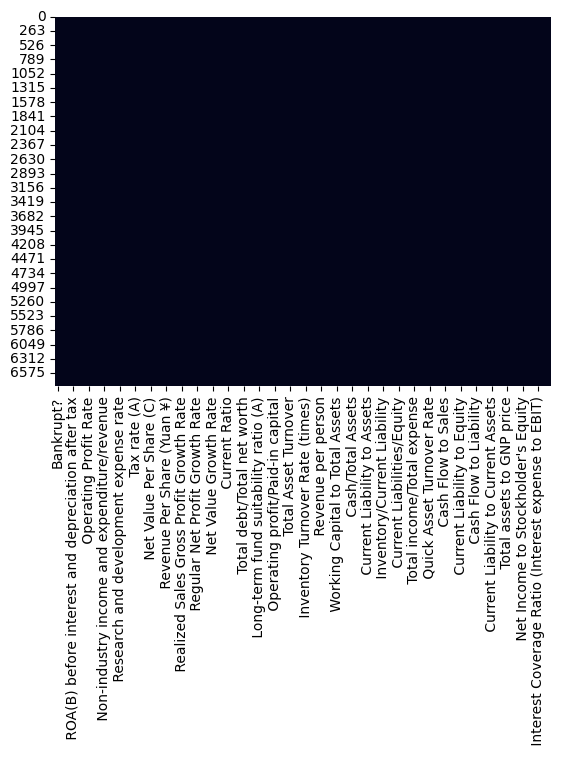

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing Data in Dataframe.

### 2. Handling Outliers

In [ ]:
df=dataset.copy()

In [ ]:
# Handling Outliers & Outlier treatments

# creating list of symmetric and non symmetric variables
sym_feat = []
non_sym_feat = []

# variables having skewness > 0.5 are highly skewed and skewness <0.5 are symmetric variables
for var in df.describe().columns.to_list()[1:]:
  if abs(df[var].skew()) > 0.5:
    non_sym_feat.append(var)
  else:
    sym_feat.append(var)


In [ ]:
df.loc[500][0]

0.0

In [ ]:
# For Symmetric features defining upper and lower boundry
# def outlier_treatment_sym(tdf,feature):
#   upper_boundary = tdf[feature].mean() + 3*tdf[feature].std()
#   lower_boundary = tdf[feature].mean() - 3*tdf[feature].std()
#   return upper_boundary,lower_boundary

# # Restricting the data to lower and upper boundry
# # no_of_outlier_df =pd.DataFrame()
# for feature in sym_feat:
#   up_bound , lo_bound = outlier_treatment_sym(df,feature)
#   index_outlier = df[(df[feature] >= up_bound) | (df[feature] <= lo_bound)].index
#   for i in index_outlier:

#     if df.loc[i][0] == 0:
#       df.drop(i , inplace=True)
#     else:
#       continue

In [ ]:
# for non Symmetric Features Defining the boundaries
# def outlier_treatment_non_sym(tdf,feature):
#   IQR = tdf[feature].quantile(0.75) - tdf[feature].quantile(0.25) + 1
#   upper_boundary = tdf[feature].quantile(0.75) + 3 * IQR
#   lower_boundary = tdf[feature].quantile(0.25) - 3 * IQR
#   return upper_boundary,lower_boundary

# # Restricting the data to lower and upper boundry
# for feature in non_sym_feat:
#   up_bound , lo_bound = outlier_treatment_non_sym(df,feature)
#   index_outlier = df[(df[feature] >= up_bound) | (df[feature] <= lo_bound)].index
#   for i in index_outlier:

#     if df.loc[i][0] == 0:
#       df.drop(i , inplace=True)
#     else:
#       continue

##### What all outlier treatment techniques have you used and why did you use those techniques?

Tried Different Outlier Detection techniques and as the data is Scaled between Zero and one so most of the variable have high kurtosis. and the IQR values are very low so. have Decided Not to apply any outlier deteection technique but to drop some values from important columns as per requirement. Also already done that while visualizing the important variables

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# no Categorical variable for enoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

No text columns in the data

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

As we are not goin to use Logistic regression. we are going to use Tree based algorithms So, Multi collinearity will not effect over model.

but Highly similar variables will increase the computational complexity.

We have foound the similar variables in EDA stage and performed Hypothesis testing on them.

From the result of Hypothesis testing we can drop the following variables.



In [ ]:
# Manipulate Features to minimize feature correlation and create new features
drop_list = [' ROA(C) before interest and depreciation before interest',
                 ' ROA(B) before interest and depreciation after tax']

In [ ]:
df.drop(columns=drop_list,inplace =True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

corr_df = abs(df.corr())['Bankrupt?'].sort_values(ascending=False)[1:]
corr_df = corr_df[corr_df>0.05]
imp_features = list(corr_df.index)

In [ ]:
X = df[[x for x in imp_features]]
y = df["Bankrupt?"]

##### What all feature selection methods have you used  and why?

As the number of Features is high we have used simple rule to eliminate the variables which have less than 0.05 correlation with the input variable. 

##### Which all features you found important and why?

In [ ]:
X.columns.to_list()

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Net worth/Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Current Liability to Assets',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Current Liability to Current Assets',
 ' Liability to Equity',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (C)',
 ' Current Liability to Equity',
 ' Current Liabilities/Equity',
 ' Working Capital/Equity',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating profit/Paid-in capital',
 ' Liability-Assets Flag',
 ' Total expense/Assets',
 ' Equity to Long-term Liability',
 ' CFO to Assets',
 ' Tax rate (A)',
 ' Cash/Total Assets',
 ' Gross Profit to Sales',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating p

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
column_list = X.columns.to_list()

In [ ]:
# Scaling your data

X_scaled = pd.DataFrame()
for col_name in column_list:
    
  # scaler = StandardScaler()
  scaler = StandardScaler().fit(np.array(X[col_name]).reshape(-1,1))
  t_lst = scaler.transform(np.array(X[col_name]).reshape(-1,1))
  X_scaled[col_name] = t_lst.reshape(-1) 

##### Which method have you used to scale you data and why?

I have used a Standarad Scaler. As the data is already min max scaled without removing the outliers. Also most of the variables have Skewed Distribution.

So after removing the Outliers i have applied the Standard Scaler Transformer to  smooth the Distribution.

Also as the Standarad Scaler function gives output in form of array we have transformed each column seperately to retain the column names which will be helpful in Shap explanation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Even Though we only have Selected Features with correlation above 0.05. but still the number of Dependent features is high which can unnecessary increase the complexity in the Algorithm.

In [ ]:
# # DImensionality Reduction (If needed)
# selector = SelectKBest(f_classif, k=40)
# X_fs = selector.fit_transform(X, y)

In [ ]:
# # DImensionality Reduction (If needed)
# selector = SelectKBest(f_classif, k=40)
# X_fs = selector.fit_transform(X_scaled, y)

In [ ]:
# compute F-values and p-values
F, pval = f_classif(X_scaled, y)

# sort features by F-values in descending order
indices = np.argsort(F)[::-1]

# select top 10 features
k = 40
selected = indices[:k]

# print selected features
print(selected)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
X_selected = X_scaled.iloc[:,[col for col in selected]]

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=40)
# X_pca =pca.fit_transform(X)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Tried two Dimensionality reduction techniques One with F Score, P_Values and other was PCA analysis but as we got better results by simply selecting the best features and n=40. 

Initially Used Select K best function to select the best Features but as the output of the function is 2 Dimenstional Array instead of DataFrame that will be problem for shap explaination So, manually selected the features appying the same algorithm.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.20, random_state=42
# )

# X_train, X_test, y_train, y_test = train_test_split(
#     X_fs, y, stratify=y, test_size=0.20, random_state=42
# )

# X_train, X_test, y_train, y_test = train_test_split(
#     X_pca, y, stratify=y, test_size=0.20, random_state=42
# )

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, stratify=y, test_size=0.20, random_state=42
)

##### What data splitting ratio have you used and why? 

There is no specific rule that you MUST split the data in this or that proportion. Only thing you need to consider is to make sure the ML model will have sufficient datapoints in the training data to learn from

Depending on the size of the dataset and parameter complexity. 
The ideal split for training and testing is said to be 80:20. 

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

As you can see the Distribution of output variable only 3% companies are Bankrupt. So the ratio of Data points is 3:97. Which is a highly imbalanced Ratio compared to ideal ratio of 1:1.

In [ ]:
# Handling Imbalanced Dataset (If needed)


smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(y_smote))
x_smote.shape
y_smote.shape

X_train = x_smote
y_train = y_smote

Original dataset shape 5455
Resampled dataset shape 10558


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE is a technique used to handle class imbalance. It works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. 

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option

Random under-sampling can discard potentially useful data. 

Over-sampling can lead to overfitting. 

Tomek links can remove useful data.

## ***7. ML Model Implementation***

### Functions for printing evaluation report and updating evaluation matrix for different model

In [ ]:
models_comparison_df = pd.DataFrame(columns=['model_name','Type of model','Total Bankrupt companies','companies predicted','Recall_Score','Roc_Auc_Score'])
model_name_lst = []
model_roc_auc_dictionary = {}

# Function For Printing Evaluation Matrices
def evaluation_report_print(model_name,model_type,y_test,y_pred):

  model_name_lst.append(model_name)
  # Visualizing evaluation Metric Score chart
  print(model_name+"\n\n")
  print("*"*35+"\n\n")
  print(classification_report(y_test, y_pred))
  print('ROCAUC score:',roc_auc_score(y_test, y_pred))
  print("\nConfusion matrix \n\n",confusion_matrix(y_test, y_pred))

# Function For Updating Evaluation Matrices
def evaluation_matrix_update(model_name,model_type,y_test,y_pred):
  # updating the model comparision df
  cf = confusion_matrix(y_test, y_pred)
  models_comparison_df.loc[len(models_comparison_df.index)] = [model_name,model_type,y_test.sum(),cf[1][1],recall_score(y_test, y_pred),roc_auc_score(y_test, y_pred)]
  models_comparison_df
  
  model_roc_auc_dictionary[model_name] = pd.DataFrame()
  model_roc_auc_dictionary[model_name]['false_positive_rate'], model_roc_auc_dictionary[model_name]['true_positive_rate'], thresholds = roc_curve(y_test, y_pred)

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
dt_mod = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
dt_mod.fit(X_train, y_train)

# Predict on the model
y_pred = dt_mod.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('Decision_Tree','Base Model',y_test, y_pred)
# Updating evaluation Metric Score chart
evaluation_matrix_update('Decision_Tree','Base Model',y_test, y_pred)

Decision_Tree


***********************************


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1320
           1       0.20      0.43      0.27        44

    accuracy                           0.92      1364
   macro avg       0.59      0.69      0.61      1364
weighted avg       0.95      0.92      0.94      1364

ROCAUC score: 0.6863636363636364

Confusion matrix 

 [[1242   78]
 [  25   19]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dt_mod = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
parameters = {
              'max_depth': [4,6,8,10],
              'min_samples_leaf':[1,2],
              'min_samples_split':[2,3,4]}  

dt_cv_mod = GridSearchCV(dt_mod,parameters,cv=5,scoring='recall')
dt_cv_mod.fit(X_train,y_train)

# Predict on the model
y_pred = dt_cv_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('Decision_Tree_p','parameter tuning',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Decision_Tree_p','parameter tuning',y_test, y_pred)

Decision_Tree_p


***********************************


              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.17      0.66      0.27        44

    accuracy                           0.89      1364
   macro avg       0.58      0.78      0.61      1364
weighted avg       0.96      0.89      0.92      1364

ROCAUC score: 0.7768939393939394

Confusion matrix 

 [[1181  139]
 [  15   29]]


In [ ]:
# printing the best parameters
dt_cv_mod.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

##### Which hyperparameter optimization technique have you used and why?

I have used Gridsearch CV to compute the best results for all the provided combinations.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For Our Model Prediction we will be using Recall as Our matrix as the Data Set is imbalanced.

Recall will increase the number of predictions of Bankrupt companies on the cost of Precision which might Decrease. So we will Also Considered ROC-AUC curve for better result.

After Hyper Parameter tuning Recall Score has increased.
Initially model could only predict lower bankrupt companies out of 44. But after Hyper parameter tuning more companies were predicted correctly. ALso ROC-AUC score increased.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0    Decision_Tree        Base Model                        44   
1  Decision_Tree_p  parameter tuning                        44   

   companies predicted  Recall_Score  Roc_Auc_Score  
0                   19      0.431818       0.686364  
1                   29      0.659091       0.776894

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation
rf_mod = RandomForestClassifier(random_state=42)

# Fit the Algorithm
rf_mod.fit(X_train, y_train)

# Predict on the model
y_pred = rf_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('Random_Forest','Base Model',y_test, y_pred)

# Updating evaluation Metric Score chart
evaluation_matrix_update('Random_Forest','Base Model',y_test, y_pred)

Random_Forest


***********************************


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.38      0.64      0.47        44

    accuracy                           0.95      1364
   macro avg       0.68      0.80      0.73      1364
weighted avg       0.97      0.95      0.96      1364

ROCAUC score: 0.8007575757575757

Confusion matrix 

 [[1274   46]
 [  16   28]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
parameters = {'n_estimators':[80,100,120],
              'ccp_alpha':[0.1,0.05],
              'max_depth': [4,6,8,10],}
              # 'min_samples_leaf':[1,2],
              # 'min_samples_split':[2,3,4]}  

dt_rf_mod = RandomizedSearchCV(rf_mod,parameters,cv=5,scoring='recall')
dt_rf_mod.fit(X_train,y_train)

# Predict on the model
y_pred = dt_rf_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('Random_Forest_p','parameter tuning',y_test, y_pred)

# Updating evaluation Metric Score chart
evaluation_matrix_update('Random_Forest_p','parameter tuning',y_test, y_pred)

Random_Forest_p


***********************************


              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.82      0.29        44

    accuracy                           0.87      1364
   macro avg       0.58      0.84      0.61      1364
weighted avg       0.97      0.87      0.91      1364

ROCAUC score: 0.8446969696969697

Confusion matrix 

 [[1150  170]
 [   8   36]]


In [ ]:
dt_rf_mod.best_params_

{'n_estimators': 120, 'max_depth': 10, 'ccp_alpha': 0.05}

##### Which hyperparameter optimization technique have you used and why?

I have used Randomsearch CV to reduce the compuataion time.

Initially I had used Gridsearch CV to find the Best Parameters and the Values are being Saved.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyper Parameter tuning Recall percentage has increased. Initially model could only predict lower bankrupt companies out of 44. But after Hyper parameter tuning more companies were predicted correctly. ALso ROC-AUC score increased.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0    Decision_Tree        Base Model                        44   
1  Decision_Tree_p  parameter tuning                        44   
2    Random_Forest        Base Model                        44   
3  Random_Forest_p  parameter tuning                        44   

   companies predicted  Recall_Score  Roc_Auc_Score  
0                   19      0.431818       0.686364  
1                   29      0.659091       0.776894  
2                   28      0.636364       0.800758  
3                   36      0.818182       0.844697

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
gb_mod = GradientBoostingClassifier(random_state=42)

# Fit the Algorithm
gb_mod.fit(X_train, y_train)

# Predict on the model
y_pred = gb_mod.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('Gradient_Boost','Base Model',y_test, y_pred)
evaluation_matrix_update('Gradient_Boost','Base Model',y_test, y_pred)

Gradient_Boost


***********************************


              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.23      0.73      0.34        44

    accuracy                           0.91      1364
   macro avg       0.61      0.82      0.65      1364
weighted avg       0.97      0.91      0.93      1364

ROCAUC score: 0.8219696969696969

Confusion matrix 

 [[1210  110]
 [  12   32]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gb_mod = GradientBoostingClassifier(random_state=42)

# Fit the Algorithm
parameters = {'n_estimators':[80,100,120],
              'learning_rate':[0.1,0.05],}
              # 'max_depth': [4,6,8,10],}
              # 'min_samples_leaf':[1,2],
              # 'min_samples_split':[2,3,4]}  

gb_cv_mod = GridSearchCV(gb_mod,parameters,cv=5,scoring='recall',n_jobs=-1)
gb_cv_mod.fit(X_train,y_train)

# Predict on the model
y_pred = gb_cv_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('Gradient_Boost_p','Parameter tuning',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Gradient_Boost_p','Parameter tuning',y_test, y_pred)

Gradient_Boost_p


***********************************


              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.23      0.68      0.34        44

    accuracy                           0.92      1364
   macro avg       0.61      0.80      0.65      1364
weighted avg       0.96      0.92      0.94      1364

ROCAUC score: 0.8026515151515151

Confusion matrix 

 [[1219  101]
 [  14   30]]


In [ ]:
gb_cv_mod.best_params_

{'learning_rate': 0.1, 'n_estimators': 120}

##### Which hyperparameter optimization technique have you used and why?

As Gradient Boost Classifier is a computationally intensive. We will be using RandomizedSearchCv instead of GridSearchCV. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is slight improvement in the model after Hyper parameter tuning.

Also Ramdom Forest Classifier works better than Gradient Boost for our data.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0     Decision_Tree        Base Model                        44   
1   Decision_Tree_p  parameter tuning                        44   
2     Random_Forest        Base Model                        44   
3   Random_Forest_p  parameter tuning                        44   
4    Gradient_Boost        Base Model                        44   
5  Gradient_Boost_p  Parameter tuning                        44   

   companies predicted  Recall_Score  Roc_Auc_Score  
0                   19      0.431818       0.686364  
1                   29      0.659091       0.776894  
2                   28      0.636364       0.800758  
3                   36      0.818182       0.844697  
4                   32      0.727273       0.821970  
5                   30      0.681818       0.802652

### ML Model - 4

In [ ]:
# ML Model - 4 Implementation
knn_mod = KNeighborsClassifier()

# Fit the Algorithm
knn_mod.fit(X_train, y_train)

# Predict on the model
y_pred = knn_mod.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('KNN','Base Model',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('KNN','Base Model',y_test, y_pred)

KNN


***********************************


              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.19      0.66      0.29        44

    accuracy                           0.90      1364
   macro avg       0.59      0.78      0.62      1364
weighted avg       0.96      0.90      0.92      1364

ROCAUC score: 0.781439393939394

Confusion matrix 

 [[1193  127]
 [  15   29]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn_mod = KNeighborsClassifier()
# Fit the Algorithm
parameters = {'n_neighbors':[4,5,6],
              'weights':['uniform','distance'],
              'algorithm': ['ball_tree','kd_tree','brute'],
              'p':[1,2]}
              # 'min_samples_leaf':[1,2],
              # 'min_samples_split':[2,3,4]}  

knn_cv_mod = RandomizedSearchCV(knn_mod,parameters,cv=5,scoring='recall')
knn_cv_mod.fit(X_train,y_train)

# Predict on the model
y_pred = knn_cv_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('KNN_p','Parameter tuning',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('KNN_p','Parameter tuning',y_test, y_pred)

KNN_p


***********************************


              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.19      0.68      0.30        44

    accuracy                           0.90      1364
   macro avg       0.59      0.79      0.62      1364
weighted avg       0.96      0.90      0.92      1364

ROCAUC score: 0.7924242424242424

Confusion matrix 

 [[1192  128]
 [  14   30]]


In [ ]:
knn_cv_mod.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'algorithm': 'brute'}

##### Which hyperparameter optimization technique have you used and why?

Used Ransomized Search CV to find the best parameters for KNN algorithm. Initially used GridsearchCV but as it gets computationally heavy, have used Randomized search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyper Perameter tuning the recall_score and ROC AUC score has improved a bit.

Also Random Forest Regressor has highest Recall and ROC_AUC score. 

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0     Decision_Tree        Base Model                        44   
1   Decision_Tree_p  parameter tuning                        44   
2     Random_Forest        Base Model                        44   
3   Random_Forest_p  parameter tuning                        44   
4    Gradient_Boost        Base Model                        44   
5  Gradient_Boost_p  Parameter tuning                        44   
6               KNN        Base Model                        44   
7             KNN_p  Parameter tuning                        44   

   companies predicted  Recall_Score  Roc_Auc_Score  
0                   19      0.431818       0.686364  
1                   29      0.659091       0.776894  
2                   28      0.636364       0.800758  
3                   36      0.818182       0.844697  
4                   32      0.727273       0.821970  
5                   30      0.681818       0.802652  
6                   29      0.659091       0.781439  
7                   30      0.681818       0.792424

### ML Model - 5

In [ ]:
# ML Model - 5 Implementation
gnb_mod = GaussianNB()

# Fit the Algorithm
gnb_mod.fit(X_train, y_train)

# Predict on the model
y_pred = gnb_mod.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('Gaussian_NB','-',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Gaussian_NB','-',y_test, y_pred)

Gaussian_NB


***********************************


              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1320
           1       0.26      0.66      0.37        44

    accuracy                           0.93      1364
   macro avg       0.62      0.80      0.67      1364
weighted avg       0.96      0.93      0.94      1364

ROCAUC score: 0.7984848484848485

Confusion matrix 

 [[1238   82]
 [  15   29]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_cv_mod = GridSearchCV(gnb_mod,parameters,cv=5,scoring='recall')
gnb_cv_mod.fit(X_train,y_train)

# Predict on the model
y_pred = gnb_cv_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('Gaussian_NB_p','parameter tuning',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Gaussian_NB_p','parameter tuning',y_test, y_pred)

Gaussian_NB_p


***********************************


              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1320
           1       0.26      0.66      0.37        44

    accuracy                           0.93      1364
   macro avg       0.62      0.80      0.67      1364
weighted avg       0.96      0.93      0.94      1364

ROCAUC score: 0.7984848484848485

Confusion matrix 

 [[1238   82]
 [  15   29]]


##### Which hyperparameter optimization technique have you used and why?

As Gausian Naive Bayes has only single parameter that can be tuned. So using Grid search for intensive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Values passed in the grid couldnot find better parameter for better result.

But the performance of Random Forest Model is better for both the evaluation metrics.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0     Decision_Tree        Base Model                        44   
1   Decision_Tree_p  parameter tuning                        44   
2     Random_Forest        Base Model                        44   
3   Random_Forest_p  parameter tuning                        44   
4    Gradient_Boost        Base Model                        44   
5  Gradient_Boost_p  Parameter tuning                        44   
6               KNN        Base Model                        44   
7             KNN_p  Parameter tuning                        44   
8       Gaussian_NB                 -                        44   
9     Gaussian_NB_p  parameter tuning                        44   

   companies predicted  Recall_Score  Roc_Auc_Score  
0                   19      0.431818       0.686364  
1                   29      0.659091       0.776894  
2                   28      0.636364       0.800758  
3                   36      0.818182       0.844697  
4                   32      0.727273       0.821970  
5                   30      0.681818       0.802652  
6                   29      0.659091       0.781439  
7                   30      0.681818       0.792424  
8                   29      0.659091       0.798485  
9                   29      0.659091       0.798485

### ML Model - 6

In [ ]:
# ML Model - 6 Implementation
svc_mod = SVC(random_state=42)

# Fit the Algorithm
svc_mod.fit(X_train, y_train)

# Predict on the model
y_pred = svc_mod.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('Support_Vectors','Base Model',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Support_Vectors','Base Model',y_test, y_pred)

Support_Vectors


***********************************


              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.20      0.77      0.32        44

    accuracy                           0.89      1364
   macro avg       0.60      0.84      0.63      1364
weighted avg       0.97      0.89      0.92      1364

ROCAUC score: 0.8352272727272727

Confusion matrix 

 [[1185  135]
 [  10   34]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
parameters = {'C':[0.05,0.1],
              'kernel':['poly','rbf']}

svc_cv_mod = GridSearchCV(svc_mod,parameters,cv=5,scoring='recall')
svc_cv_mod.fit(X_train,y_train)

# Predict on the model
y_pred = svc_cv_mod.predict(X_test)

# Visualizing evaluation Metric Score chart
evaluation_report_print('Support_Vectors_p','Parameter Tuning',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Support_Vectors_p','Parameter Tuning',y_test, y_pred)

Support_Vectors_p


***********************************


              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1320
           1       0.17      0.86      0.29        44

    accuracy                           0.86      1364
   macro avg       0.58      0.86      0.61      1364
weighted avg       0.97      0.86      0.90      1364

ROCAUC score: 0.8625

Confusion matrix 

 [[1137  183]
 [   6   38]]


In [ ]:
svc_cv_mod.best_params_

{'C': 0.1, 'kernel': 'rbf'}

##### Which hyperparameter optimization technique have you used and why?

As we have used only 2 paramaters with total 4 pairs and also SVC is computationally less intensive. So I have used Grid Search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Hyper parameter tuning we can see that recall score and roc auc score both have improved.

After Hyper Parameter tuning the results when compared to other ML algorithms. the Results are joint best aligned with results of Random Forest Classifier.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0       Decision_Tree        Base Model                        44   
1     Decision_Tree_p  parameter tuning                        44   
2       Random_Forest        Base Model                        44   
3     Random_Forest_p  parameter tuning                        44   
4      Gradient_Boost        Base Model                        44   
5    Gradient_Boost_p  Parameter tuning                        44   
6                 KNN        Base Model                        44   
7               KNN_p  Parameter tuning                        44   
8         Gaussian_NB                 -                        44   
9       Gaussian_NB_p  parameter tuning                        44   
10    Support_Vectors        Base Model                        44   
11  Support_Vectors_p  Parameter Tuning                        44   

    companies predicted  Recall_Score  Roc_Auc_Score  
0                    19      0.431818       0.686364  
1                    29      0.659091       0.776894  
2                    28      0.636364       0.800758  
3                    36      0.818182       0.844697  
4                    32      0.727273       0.821970  
5                    30      0.681818       0.802652  
6                    29      0.659091       0.781439  
7                    30      0.681818       0.792424  
8                    29      0.659091       0.798485  
9                    29      0.659091       0.798485  
10                   34      0.772727       0.835227  
11                   38      0.863636       0.862500

### ML Model - 7

In [ ]:
# ML Model - 7 Implementation
xgb_mod = XGBClassifier(random_state=42)

# Fit the Algorithm
xgb_mod.fit(X_train, y_train)

# Predict on the model
y_pred = xgb_mod.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('Xtreme_Grad_Boost','Base Model',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Xtreme_Grad_Boost','Base Model',y_test, y_pred)

Xtreme_Grad_Boost


***********************************


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.38      0.59      0.46        44

    accuracy                           0.96      1364
   macro avg       0.68      0.78      0.72      1364
weighted avg       0.97      0.96      0.96      1364

ROCAUC score: 0.7795454545454545

Confusion matrix 

 [[1278   42]
 [  18   26]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# # Fit the Algorithm
# parameters = {'alpha':[0,0.1,0.2],
#               'eta':[0.3,0.1],}
#               # 'lambda': [1,0.5],}

# xgb_cv_mod = GridSearchCV(xgb_mod,parameters,cv=5,scoring='recall')
# xgb_cv_mod.fit(X_train,y_train)

# # Predict on the model
# y_pred = xgb_cv_mod.predict(X_test)

# # Visualizing evaluation Metric Score chart
# evaluation_report_print('Xtreme_Grad_Boost_p','Parameter Tuning',y_test, y_pred)

# # updating evaluation Metric Score chart
# evaluation_matrix_update('Xtreme_Grad_Boost_p','Parameter Tuning',y_test, y_pred)

In [ ]:
gb_cv_mod.best_params_

{'learning_rate': 0.1, 'n_estimators': 120}

##### Which hyperparameter optimization technique have you used and why?

Total of 4 pairs of parameters are put to test. So for a small grid Gridsearch is used.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Tried Xtreme Gradient Boost to find better results compared to Random Forest and Support Vectors but even after Hyper Perameter tuning better results could not be obtained.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0       Decision_Tree        Base Model                        44   
1     Decision_Tree_p  parameter tuning                        44   
2       Random_Forest        Base Model                        44   
3     Random_Forest_p  parameter tuning                        44   
4      Gradient_Boost        Base Model                        44   
5    Gradient_Boost_p  Parameter tuning                        44   
6                 KNN        Base Model                        44   
7               KNN_p  Parameter tuning                        44   
8         Gaussian_NB                 -                        44   
9       Gaussian_NB_p  parameter tuning                        44   
10    Support_Vectors        Base Model                        44   
11  Support_Vectors_p  Parameter Tuning                        44   
12  Xtreme_Grad_Boost        Base Model                        44   

    companies predicted  Recall_Score  Roc_Auc_Score  
0                    19      0.431818       0.686364  
1                    29      0.659091       0.776894  
2                    28      0.636364       0.800758  
3                    36      0.818182       0.844697  
4                    32      0.727273       0.821970  
5                    30      0.681818       0.802652  
6                    29      0.659091       0.781439  
7                    30      0.681818       0.792424  
8                    29      0.659091       0.798485  
9                    29      0.659091       0.798485  
10                   34      0.772727       0.835227  
11                   38      0.863636       0.862500  
12                   26      0.590909       0.779545

### ML Model - 8

In [ ]:
# ML Model - 8 Implementation

dt = DecisionTreeClassifier(max_depth=9)
knn = KNeighborsClassifier(p=1,n_neighbors=4,weights='distance',algorithm='ball_tree')
rf = RandomForestClassifier(ccp_alpha=0.05,max_depth=6,n_estimators=80)
nb = GaussianNB()
gb = GradientBoostingClassifier()
svc = SVC(C=0.1,kernel='rbf')

stack = StackingClassifier(estimators=[('rf',rf),('svc',svc)], final_estimator=SVC())

In [ ]:
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_report_print('Stacking','(rf+svc)+svc',y_test, y_pred)

# updating evaluation Metric Score chart
evaluation_matrix_update('Stacking','(rf+svc)+svc',y_test, y_pred)

Stacking


***********************************


              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.20      0.80      0.32        44

    accuracy                           0.89      1364
   macro avg       0.60      0.84      0.63      1364
weighted avg       0.97      0.89      0.92      1364

ROCAUC score: 0.8439393939393939

Confusion matrix 

 [[1178  142]
 [   9   35]]


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall and ROC AUC are two evaluation metrics that can be useful for bankruptcy prediction, especially when the data is imbalanced.

Recall is the fraction of true positives (bankrupt companies that are correctly predicted) out of all actual positives (all bankrupt companies). Recall measures how well the classifier can identify the positive class, which is important for bankruptcy prediction because we want to avoid missing any bankrupt company. A high recall means that the classifier can capture most of the positive cases

ROC AUC is the area under the receiver operating characteristic (ROC) curve, which plots the true positive rate (recall) against the false positive rate (the fraction of non-bankrupt companies that are incorrectly predicted as bankrupt) for different decision thresholds. ROC AUC measures how well the classifier can discriminate between the two classes, regardless of the decision threshold. A high ROC AUC means that the classifier can achieve a high recall with a low false positive rate.

Both recall and ROC AUC are suitable for imbalanced classification because they are not affected by the class distribution1. They can provide a better indication of the classifier’s performance than accuracy, which can be misleading when the data is skewed1. For example, if 90% of the companies are not bankrupt, a classifier that always predicts not bankrupt will have a high accuracy of 90%, but a low recall

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Have Selected Support vector Classifier as the final model. As it has bot highest recall_score and ROC AUC score.

In [ ]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0       Decision_Tree        Base Model                        44   
1     Decision_Tree_p  parameter tuning                        44   
2       Random_Forest        Base Model                        44   
3     Random_Forest_p  parameter tuning                        44   
4      Gradient_Boost        Base Model                        44   
5    Gradient_Boost_p  Parameter tuning                        44   
6                 KNN        Base Model                        44   
7               KNN_p  Parameter tuning                        44   
8         Gaussian_NB                 -                        44   
9       Gaussian_NB_p  parameter tuning                        44   
10    Support_Vectors        Base Model                        44   
11  Support_Vectors_p  Parameter Tuning                        44   
12  Xtreme_Grad_Boost        Base Model                        44   
13           Stacking      (rf+svc)+svc                        44   

    companies predicted  Recall_Score  Roc_Auc_Score  
0                    19      0.431818       0.686364  
1                    29      0.659091       0.776894  
2                    28      0.636364       0.800758  
3                    36      0.818182       0.844697  
4                    32      0.727273       0.821970  
5                    30      0.681818       0.802652  
6                    29      0.659091       0.781439  
7                    30      0.681818       0.792424  
8                    29      0.659091       0.798485  
9                    29      0.659091       0.798485  
10                   34      0.772727       0.835227  
11                   38      0.863636       0.862500  
12                   26      0.590909       0.779545  
13                   35      0.795455       0.843939

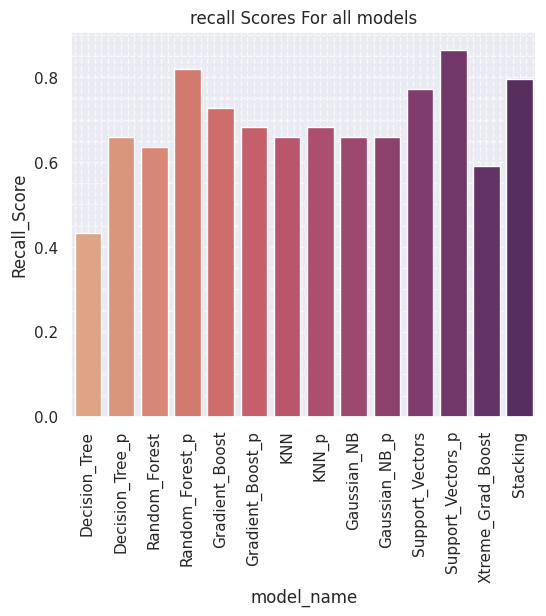

In [ ]:
# setting the chart size
ax = plt.figure(figsize=(6,5))
sns.set_theme()

# setting the axis label for chart
ax= sns.barplot(data=models_comparison_df, x="model_name",y='Recall_Score',palette='flare')
ax.set(title='recall Scores For all models')
# adding visualizations to chart
ax.minorticks_on()
plt.grid(which='both',alpha=0.7,linestyle='--')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'False Positive Rate')

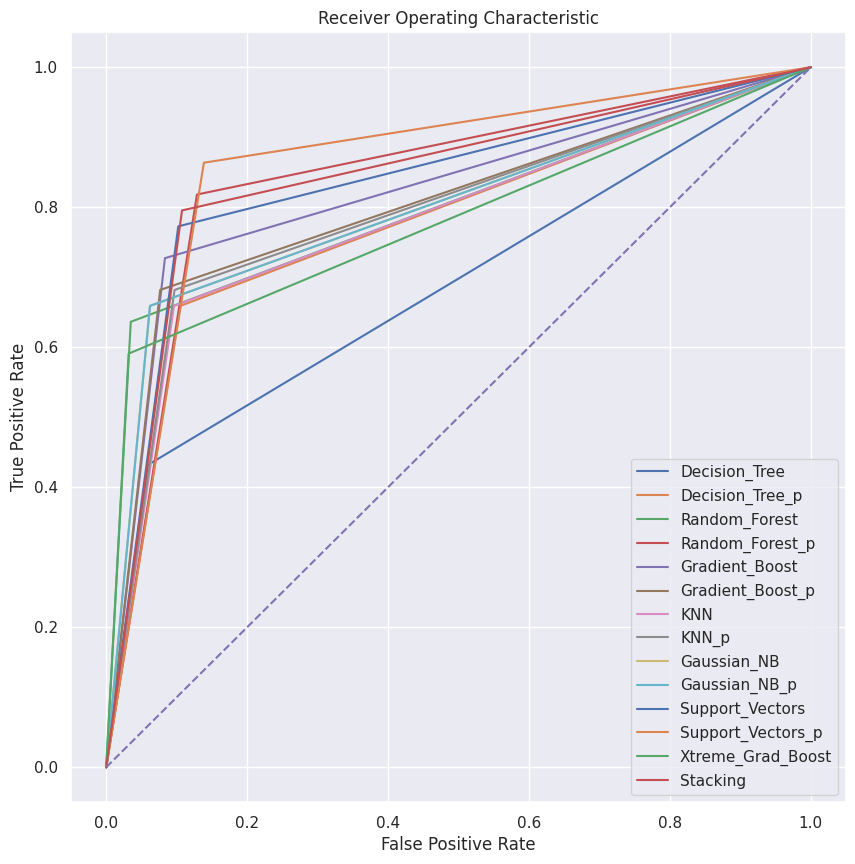

In [ ]:

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
# plt.plot(false_positive_rate,true_positive_rate, color='red')
# plt.plot(false_positive_rate,true_positive_rate, color='red')
for x,tdf in enumerate(model_roc_auc_dictionary):
   plt.plot(model_roc_auc_dictionary[tdf]['false_positive_rate'],model_roc_auc_dictionary[tdf]['true_positive_rate'],label=tdf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# for x in model_roc_auc_dictionary:
#   plt.plot(x['false_positive_rate'],x['true_positive_rate'])

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

SHAP (SHapley Additive exPlanations) leverages the idea of Shapley values for model feature influence scoring. The technical definition of a Shapley value is the “average marginal contribution of a feature value over all possible coalitions”.

SHAP feature dependence might be the simplest global interpretation plot. It involves picking a feature and for each data instance, plotting a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis.

The main advantage of SHAP over partial dependence plots and LIME is that it guarantees that the prediction is fairly distributed across different features. SHAP can compute the global interpretation by computing the Shapley values for a whole dataset and combine them.

In [ ]:
# Explainer Object for random forest CV Classifier
explainer = shap.Explainer(dt_rf_mod.predict, X_train)
# Genrating the shapley values for the model.
shap_values = explainer(X_test)

Permutation explainer: 1365it [10:52,  2.07it/s]


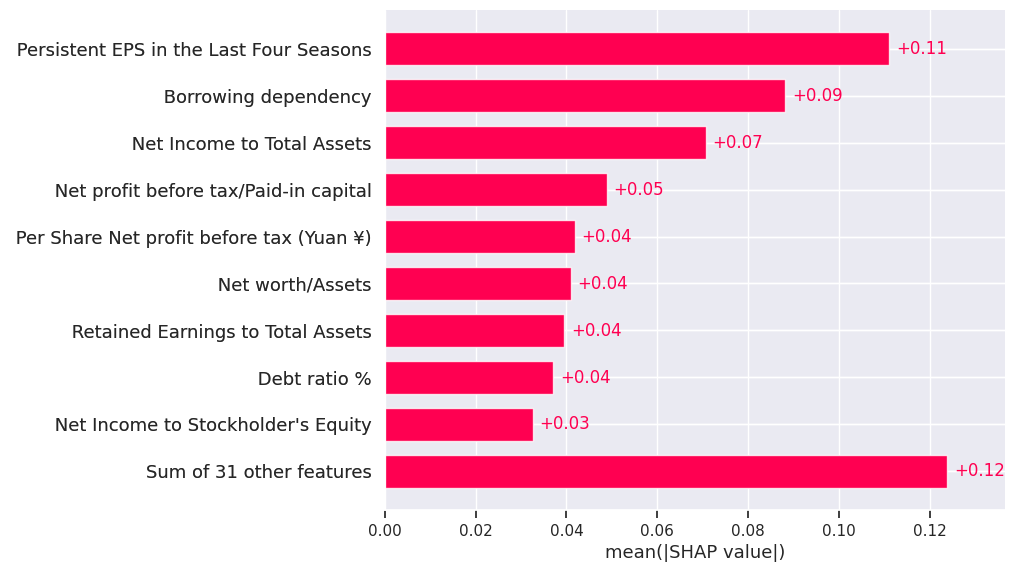

In [ ]:
# Plotting the feature importance plot
shap.plots.bar(shap_values)

* The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. 

* Since we want the global importance, we average the absolute Shapley values per feature across the data

* The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance

we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



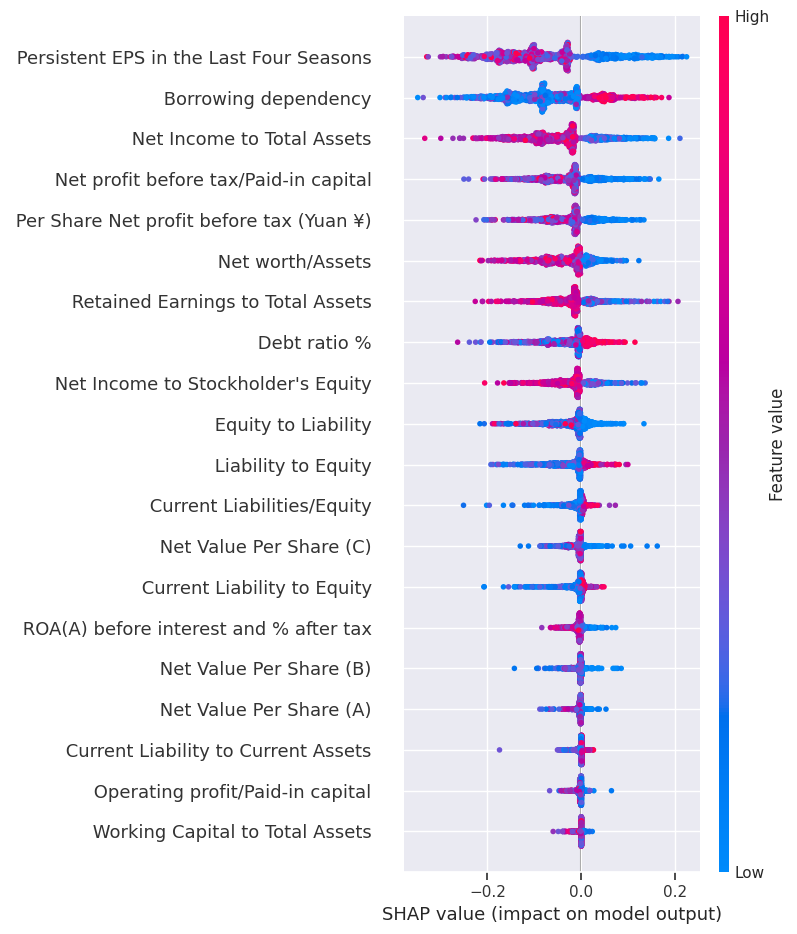

In [ ]:
# Plotting the Summary Plot for Shapley values
shap.summary_plot(shap_values, X_test)

**Explaining A Single Output**

The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

In [ ]:
# Creating a Function for displaying Waterfall and condensed plot for a given data:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx], matplotlib=True)
        
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    
    else:
        return "Return valid visual ('condensed', 'waterfall')"

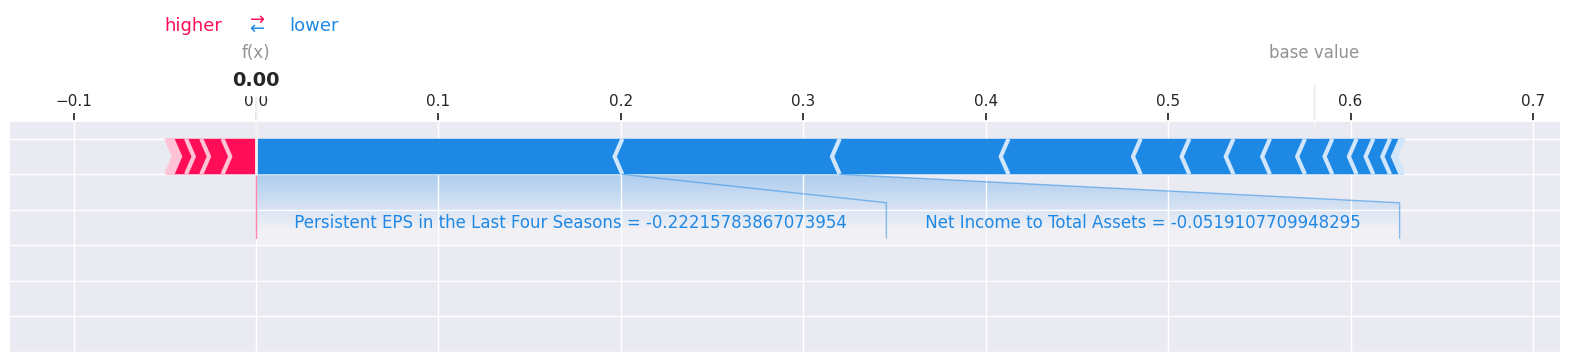

In [ ]:
# plotting the Waterfall plot for and sample
sample_feature_importance(0,'condensed')

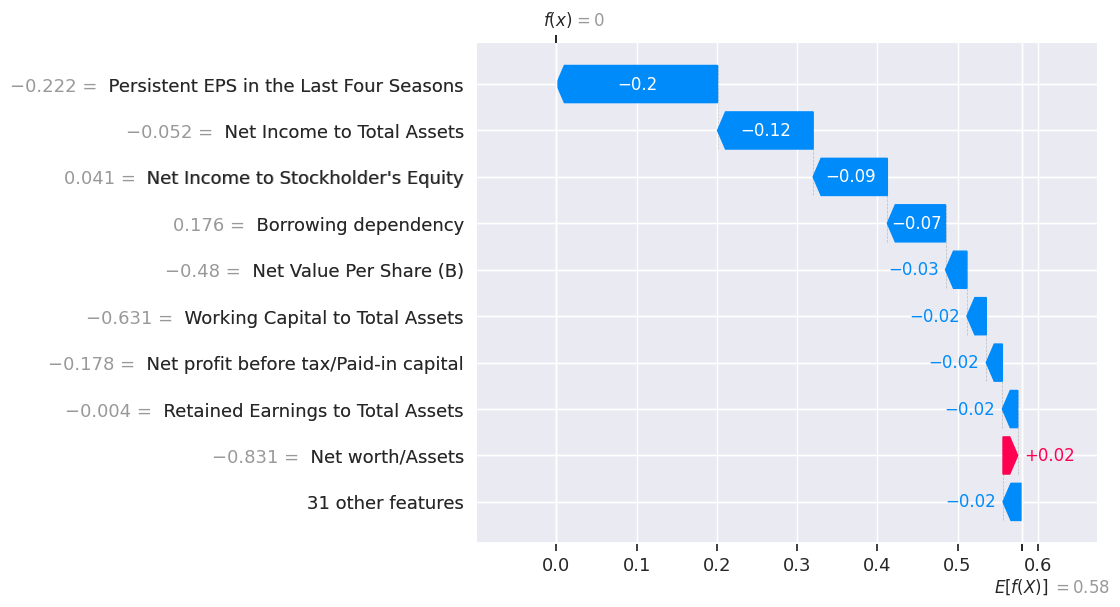

In [ ]:
# plotting the Waterfall plot for and sample
sample_feature_importance(0,'waterfall')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project is a binary classification problem that aims to predict whether a company will go bankrupt or not based on their financial information. The dataset used for this project contains the financial information of companies operating in Taiwan between 1999 and 2009, collected by the Taiwan Economic Journal. The project has the following steps:

* EDA and Visualization: Exploratory data analysis and visualization of the dataset to understand the distribution, correlation, and outliers of the variables.

* Hypothesis testing: Statistical tests to verify or reject some hypotheses about the relationship between the variables and the bankruptcy status of the companies.

* Feature engineering: Feature selection, transformation, and scaling to prepare the data for modeling.

* Model implementation: Implementation of various machine learning algorithms such as decision tree, random forest, gradient boosting, KNN, Gaussian NB, support vector machine, Xtreme gradient boosting, and stacking to build and compare different classification models.

* ML model evaluation: Evaluation of the performance of the models using metrics such as recall score and ROC AUC score to select the best model for predicting bankruptcy.

* Model explainability: Interpretation of the results and findings of the best model using techniques such as feature importance and SHAP values to understand how the model makes predictions and what are the most influential factors for bankruptcy.

In [141]:
models_comparison_df

model_name     Type of model  Total Bankrupt companies  \
0       Decision_Tree        Base Model                        44   
1     Decision_Tree_p  parameter tuning                        44   
2       Random_Forest        Base Model                        44   
3     Random_Forest_p  parameter tuning                        44   
4      Gradient_Boost        Base Model                        44   
5    Gradient_Boost_p  Parameter tuning                        44   
6                 KNN        Base Model                        44   
7               KNN_p  Parameter tuning                        44   
8         Gaussian_NB                 -                        44   
9       Gaussian_NB_p  parameter tuning                        44   
10    Support_Vectors        Base Model                        44   
11  Support_Vectors_p  Parameter Tuning                        44   
12  Xtreme_Grad_Boost        Base Model                        44   
13           Stacking      (rf+svc)+svc                        44   

    companies predicted  Recall_Score  Roc_Auc_Score  
0                    19      0.431818       0.686364  
1                    29      0.659091       0.776894  
2                    28      0.636364       0.800758  
3                    36      0.818182       0.844697  
4                    32      0.727273       0.821970  
5                    30      0.681818       0.802652  
6                    29      0.659091       0.781439  
7                    30      0.681818       0.792424  
8                    29      0.659091       0.798485  
9                    29      0.659091       0.798485  
10                   34      0.772727       0.835227  
11                   38      0.863636       0.862500  
12                   26      0.590909       0.779545  
13                   35      0.795455       0.843939

The best model based on the recall score and ROC AUC score is the support vector machine with parameter tuning, which achieved an F1 score of 86.36% on the test dataset.

The project concluded that machine learning algorithms can be useful tools for predicting company bankruptcy based on their financial information, and that support vector machine is the most suitable algorithm for this task. The project also identified some of the most important features for bankruptcy prediction, such as 

* Persistent EPS in the Last Four Seasons,
* Borrowing dependency.
* Net Income to Total Assets.
* Net profit before tax/Paid-in capital.
* Per Share Net profit before tax.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***